<a href="https://colab.research.google.com/github/JosephineNakalembe/github-practice/blob/main/conception_estimation_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

josephinenakalembe_demographic_path = kagglehub.dataset_download('josephinenakalembe/demographic')
josephinenakalembe_hormonal_path = kagglehub.dataset_download('josephinenakalembe/hormonal')
josephinenakalembe_physical_path = kagglehub.dataset_download('josephinenakalembe/physical')
josephinenakalembe_physiological_path = kagglehub.dataset_download('josephinenakalembe/physiological')
josephinenakalembe_prior_pregnancy_path = kagglehub.dataset_download('josephinenakalembe/prior-pregnancy')
josephinenakalembe_medical2_path = kagglehub.dataset_download('josephinenakalembe/medical2')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hormonal/hormanal.csv
/kaggle/input/physical/physical.csv
/kaggle/input/physiological/physiological.csv
/kaggle/input/prior-pregnancy/prior.csv
/kaggle/input/demographic/demographic.csv
/kaggle/input/medical2/medical.csv


In [ ]:
# ===================================
# 0️⃣ Import libraries
# ===================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================
# 1️⃣ Load datasets
# ===================================
demographic = pd.read_csv('/kaggle/input/demographic/demographic.csv')
hormonal = pd.read_csv('/kaggle/input/hormonal/hormanal.csv')
medical = pd.read_csv('/kaggle/input/medical2/medical.csv')
physical = pd.read_csv('/kaggle/input/physical/physical.csv')
physiological = pd.read_csv('/kaggle/input/physiological/physiological.csv')
prior = pd.read_csv('/kaggle/input/prior-pregnancy/prior.csv')

# Function to safely select columns
def select_columns(df, cols):
    existing_cols = [col for col in cols if col in df.columns]
    return df[existing_cols]

# Define columns to keep
demographic_cols = ['AGE', 'BMI']
hormonal_cols = ['E2', 'Progesterone', 'LH', 'FSH']
medical_cols = ['any diesease?']
physical_cols = ['Weight (kg)', 'Height (m)', 'Workout_Type', 'diet_type']
physiological_cols = ['CycleNumber', 'LengthofCycle', 'EstimatedDayofOvulation',
                      'LengthofLutealPhase', 'TotalDaysofFertility']
prior_cols = ['Gravida']

# Select columns
demographic = select_columns(demographic, demographic_cols)
hormonal = select_columns(hormonal, hormonal_cols)
medical = select_columns(medical, medical_cols)
physical = select_columns(physical, physical_cols)
physiological = select_columns(physiological, physiological_cols)
prior = select_columns(prior, prior_cols)

# Combine all datasets side by side
final_df = pd.concat([demographic, hormonal, medical, physical, physiological, prior], axis=1)

# Preview the combined dataframe
print("✅ Combined dataset shape:", final_df.shape)
display(final_df.head(100))




✅ Combined dataset shape: (20000, 17)


,AGE,BMI,E2,Progesterone,LH,FSH,any diesease?,Weight (kg),Height (m),Workout_Type,diet_type,CycleNumber,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,TotalDaysofFertility,Gravida
0,20.0,24.088223,199.0,0.60,7.69,9.83,0.0,65.27,1.62,Strength,Vegan,1.0,29.0,17,12,9,1st
1,20.0,19.467401,834.0,17.60,8.04,6.47,1.0,56.41,1.55,HIIT,Vegetarian,2.0,27.0,15,12,6,2nd
2,20.0,19.562955,1029.0,64.10,5.83,3.34,0.0,58.98,1.67,Cardio,Paleo,3.0,29.0,15,14,5,1st
3,20.0,19.571681,102.0,1.29,4.80,9.04,0.0,93.78,1.70,HIIT,Paleo,4.0,27.0,15,12,6,1st
4,20.0,19.834711,306.0,17.90,15.80,20.20,1.0,52.42,1.88,Strength,Vegan,5.0,28.0,16,12,8,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24.0,28.398718,NaN,NaN,NaN,NaN,0.0,109.07,1.91,Yoga,Paleo,1.0,29.0,14,15,7,2nd
96,21.0,21.641274,NaN,NaN,NaN,NaN,0.0,48.50,1.64,Strength,Low-Carb,2.0,29.0,16,13,9,1st
97,23.0,22.582709,NaN,NaN,NaN,NaN,0.0,64.40,1.71,HIIT,Paleo,3.0,26.0,13,13,7,1st
98,20.0,25.217359,NaN,NaN,NaN,NaN,0.0,54.63,1.57,Strength,Vegan,4.0,25.0,12,13,6,1st


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual dataframe name
df = final_df

# Separate categorical and numeric columns
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include=np.number)

# View summaries
print("Categorical columns:\n", df_cat.columns.tolist())
print("\nNumeric columns:\n", df_num.columns.tolist())


Categorical columns:
 ['Workout_Type', 'diet_type', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'TotalDaysofFertility', 'Gravida']

Numeric columns:
 ['AGE', 'BMI', 'E2', 'Progesterone', 'LH', 'FSH', 'any diesease?', 'Weight (kg)', 'Height (m)', 'CycleNumber', 'LengthofCycle']


In [ ]:
# ✅ Convert all categorical columns to numeric dummies
df_encoded = pd.get_dummies(df_cat, drop_first=True)

# Combine back with numeric data if you have it
df_final = pd.concat([df_num, df_encoded], axis=1)

# Check results
print("✅ Encoding complete!")
print("New dataframe shape:", df_final.shape)
print("\nPreview:")
df_final.head()


✅ Encoding complete!
New dataframe shape: (20000, 98)

Preview:


,AGE,BMI,E2,Progesterone,LH,FSH,any diesease?,Weight (kg),Height (m),CycleNumber,...,TotalDaysofFertility_27,TotalDaysofFertility_3,TotalDaysofFertility_4,TotalDaysofFertility_5,TotalDaysofFertility_6,TotalDaysofFertility_7,TotalDaysofFertility_8,TotalDaysofFertility_9,Gravida_2nd,Gravida_3rd
0,20.0,24.088223,199.0,0.60,7.69,9.83,0.0,65.27,1.62,1.0,...,False,False,False,False,False,False,False,True,False,False
1,20.0,19.467401,834.0,17.60,8.04,6.47,1.0,56.41,1.55,2.0,...,False,False,False,False,True,False,False,False,True,False
2,20.0,19.562955,1029.0,64.10,5.83,3.34,0.0,58.98,1.67,3.0,...,False,False,False,True,False,False,False,False,False,False
3,20.0,19.571681,102.0,1.29,4.80,9.04,0.0,93.78,1.70,4.0,...,False,False,False,False,True,False,False,False,False,False
4,20.0,19.834711,306.0,17.90,15.80,20.20,1.0,52.42,1.88,5.0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
import pandas as pd
import numpy as np

# ===============================
# 1️⃣  Check for missing values
# ===============================
print("🔹 Missing values per column:")
print(final_df.isnull().sum())

# ===============================
# 2️⃣  Separate numeric and categorical columns
# ===============================
numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = final_df.select_dtypes(include=['object']).columns

# ===============================
# 3️⃣  Fill missing numeric values
# ===============================
# You can choose one of these strategies:
#   - mean (default)
#   - median (better for skewed data)
#   - zero (for some physiological measures)

final_df[numeric_cols] = final_df[numeric_cols].fillna(final_df[numeric_cols].mean())
# or use median: final_df[numeric_cols] = final_df[numeric_cols].fillna(final_df[numeric_cols].median())

# ===============================
# 4️⃣  Fill missing categorical values
# ===============================
final_df[categorical_cols] = final_df[categorical_cols].fillna('Unknown')

# ===============================
# 5️⃣  Verify the results
# ===============================
print("\n✅ Missing values after filling:")
print(final_df.isnull().sum())


🔹 Missing values per column:
AGE                        19639
BMI                        19639
E2                         19952
Progesterone               19952
LH                         19952
FSH                        19952
any diesease?              19838
Weight (kg)                    0
Height (m)                     0
Workout_Type                   0
diet_type                      0
CycleNumber                18335
LengthofCycle              18335
EstimatedDayofOvulation    18335
LengthofLutealPhase        18335
TotalDaysofFertility       18335
Gravida                    19002
dtype: int64

✅ Missing values after filling:
AGE                        0
BMI                        0
E2                         0
Progesterone               0
LH                         0
FSH                        0
any diesease?              0
Weight (kg)                0
Height (m)                 0
Workout_Type               0
diet_type                  0
CycleNumber                0
LengthofCycle   

🔹 Correlation matrix:
                    AGE       BMI        E2  Progesterone        LH       FSH  \
AGE            1.000000  0.241584  0.008172      0.041123 -0.024727 -0.013404   
BMI            0.241584  1.000000  0.006421      0.019780 -0.033179 -0.002073   
E2             0.008172  0.006421  1.000000      0.332294  0.403440 -0.157640   
Progesterone   0.041123  0.019780  0.332294      1.000000 -0.325078 -0.481893   
LH            -0.024727 -0.033179  0.403440     -0.325078  1.000000  0.521917   
FSH           -0.013404 -0.002073 -0.157640     -0.481893  0.521917  1.000000   
any diesease?  0.049245  0.042397 -0.068686      0.142732 -0.069213  0.008462   
Weight (kg)    0.000717  0.008281 -0.001061      0.007669  0.000232 -0.002877   
Height (m)    -0.001753  0.000551 -0.009691     -0.005617  0.001671  0.006840   
CycleNumber    0.092969 -0.053238  0.012653      0.029387  0.028858  0.049337   
LengthofCycle  0.002759 -0.033018  0.023021     -0.001559 -0.004401 -0.025454   

     

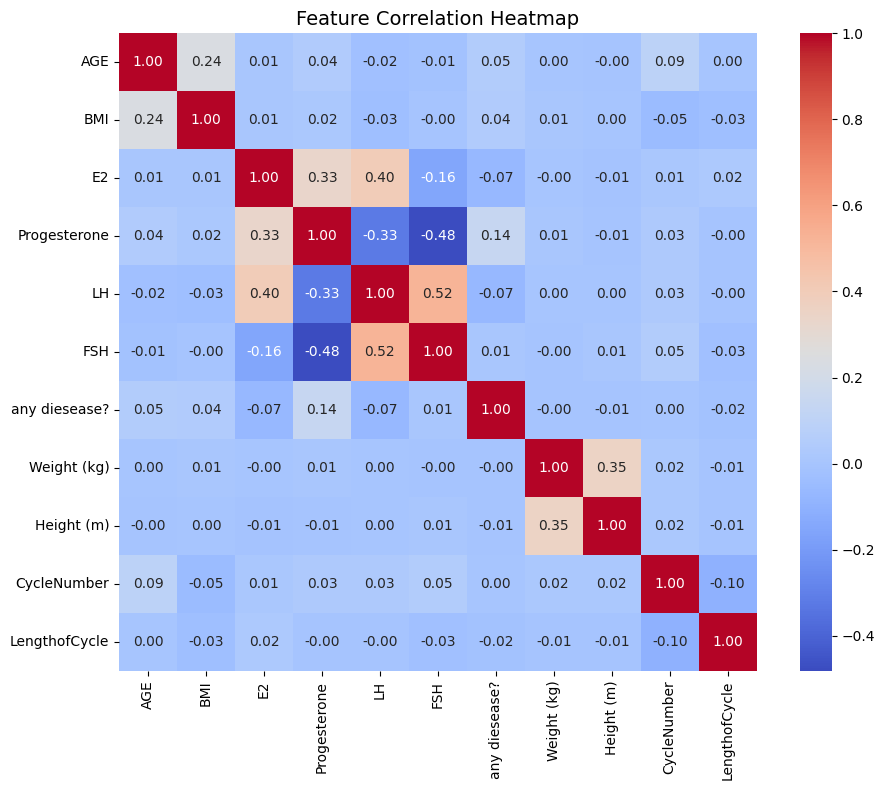


🔹 Top correlated feature pairs:
LH            FSH             0.521917
FSH           LH              0.521917
E2            LH              0.403440
LH            E2              0.403440
Weight (kg)   Height (m)      0.353763
Height (m)    Weight (kg)     0.353763
Progesterone  E2              0.332294
E2            Progesterone    0.332294
AGE           BMI             0.241584
BMI           AGE             0.241584
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1️⃣  Ensure only numeric columns are used
# ===============================
numeric_df = final_df.select_dtypes(include=['int64', 'float64'])

# ===============================
# 2️⃣  Compute correlation matrix
# ===============================
corr_matrix = numeric_df.corr()

# Display correlation values
print("🔹 Correlation matrix:")
print(corr_matrix)

# ===============================
# 3️⃣  Visualize correlations (heatmap)
# ===============================
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

# ===============================
# 4️⃣  Optional: View top correlations
# ===============================
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
# Remove self-correlations (value = 1.0)
corr_pairs = corr_pairs[corr_pairs < 1.0]
print("\n🔹 Top correlated feature pairs:")
print(corr_pairs.head(10))


In [ ]:
# Automatically detect categorical (object or string) columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns found:", categorical_cols)


Categorical columns found: ['Workout_Type', 'diet_type', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'TotalDaysofFertility', 'Gravida']


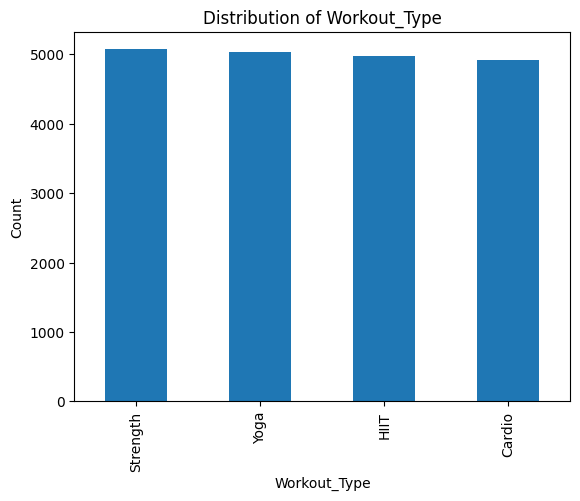

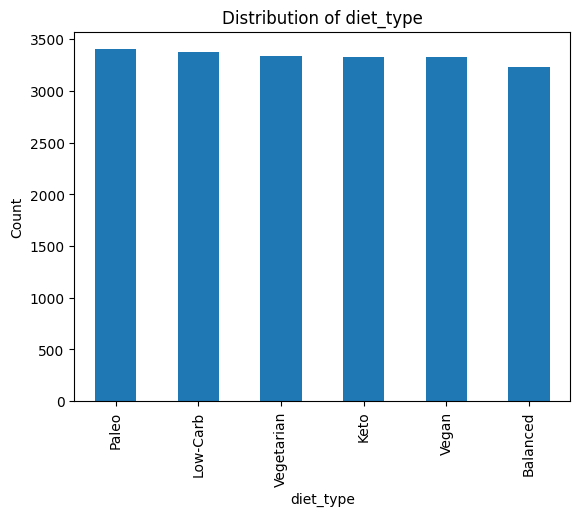

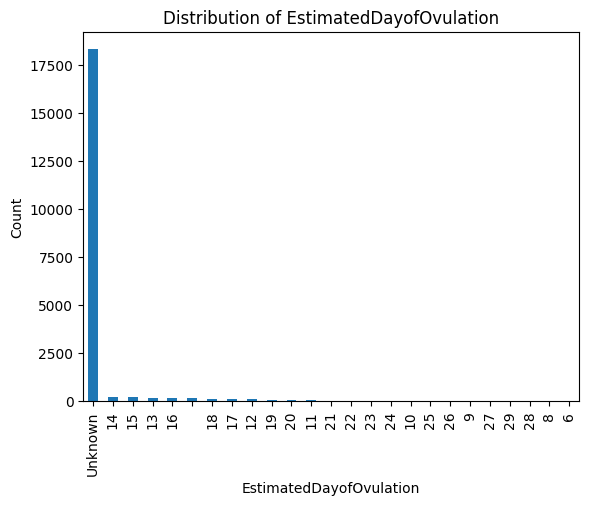

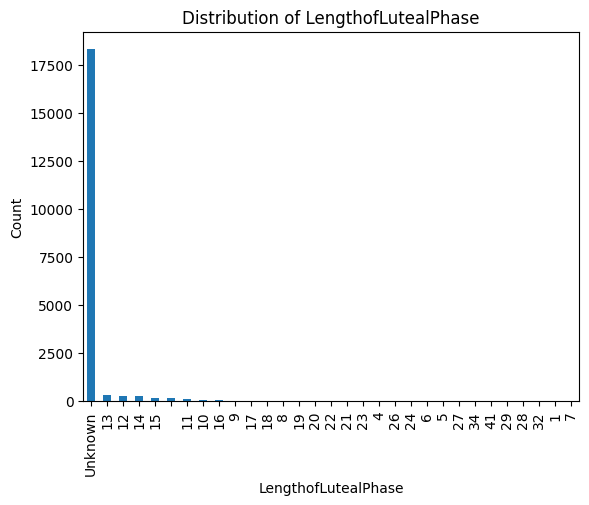

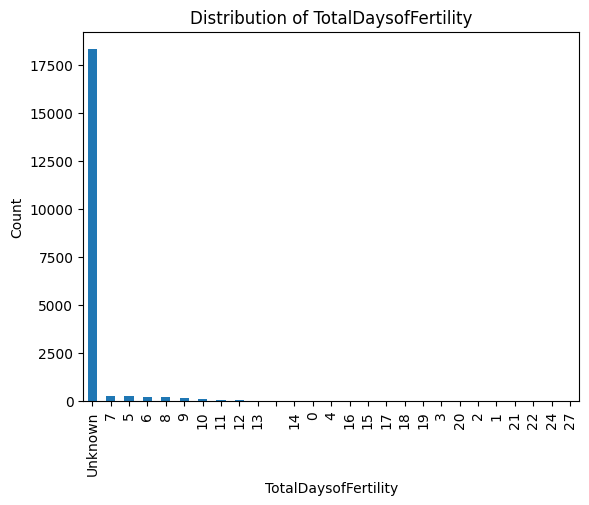

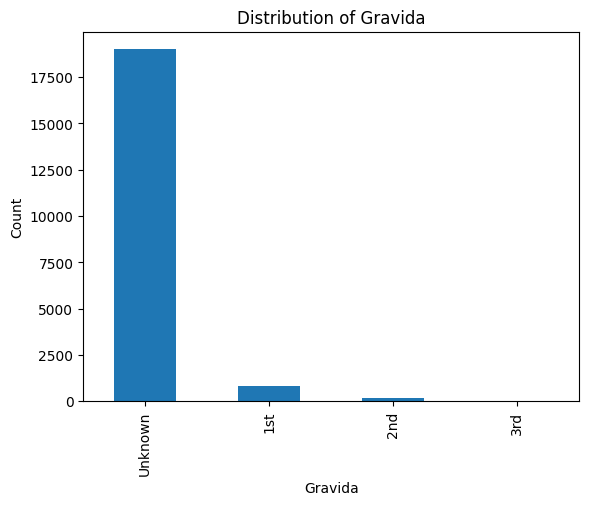

In [ ]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [ ]:
summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].nunique() for col in categorical_cols],
    'Most Frequent Category': [df[col].mode()[0] if not df[col].mode().empty else None for col in categorical_cols],
    'Missing Values': [df[col].isnull().sum() for col in categorical_cols]
})

print(summary)


                    Column  Unique Values Most Frequent Category  \
0             Workout_Type              4               Strength   
1                diet_type              6                  Paleo   
2  EstimatedDayofOvulation             25                Unknown   
3      LengthofLutealPhase             31                Unknown   
4     TotalDaysofFertility             27                Unknown   
5                  Gravida              4                Unknown   

   Missing Values  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  


In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# Parameters
# ==========================================
num_patients = 100         # Number of patients
min_cycles = 3             # Minimum cycles per patient
max_cycles = 7             # Maximum cycles per patient

# ==========================================
# Generate synthetic data
# ==========================================
rows = []

for pid in range(1, num_patients + 1):
    num_cycles = np.random.randint(min_cycles, max_cycles + 1)
    age = np.random.randint(20, 40)
    bmi = np.random.uniform(18, 30)
    weight = np.random.randint(50, 80)
    height = np.random.uniform(1.55, 1.80)
    disease = np.random.choice(['Yes', 'No'])
    workout = np.random.choice(['Light', 'Moderate', 'Heavy'])
    diet = np.random.choice(['Balanced', 'High Protein', 'Low Carb'])

    for cycle in range(1, num_cycles + 1):
        row = {
            'age': age,
            'bmi': bmi,
            'e2': np.random.randint(80, 150),
            'progesterone': np.random.uniform(0.4, 2.0),
            'lh': np.random.uniform(8, 15),
            'fsh': np.random.uniform(4, 7),
            'any_disease': disease,
            'weight_kg': weight,
            'height_m': height,
            'workout_type': workout,
            'diet_type': diet,
            'lengthofcycle': np.random.randint(26, 32),
            'estimateddayofovulation': np.random.randint(12, 18),
            'lengthoflutealphase': 14,
            'totaldaysoffertility': np.random.randint(4, 7),
            'gravida': np.random.randint(0, 3),
            'personid': f"P{pid:03d}",
            'cyclenumber': cycle
        }
        rows.append(row)

# Create DataFrame
df_patients = pd.DataFrame(rows)

# Set cycle_index
df_patients = df_patients.sort_values(['personid', 'cyclenumber']).reset_index(drop=True)
df_patients['cycle_index'] = df_patients.groupby('personid').cumcount() + 1
df_patients = df_patients.set_index(['personid', 'cyclenumber'])

# Save
df_patients.to_csv("cycle_indexed_table_multiple_patients.csv")

print("Cycle-indexed table with multiple patients and cycles created.")
print("Shape:", df_patients.shape)
print(df_patients.head())


Cycle-indexed table with multiple patients and cycles created.
Shape: (498, 17)
                      age        bmi   e2  progesterone         lh       fsh  \
personid cyclenumber                                                           
P001     1             37  20.113847  123      0.486352  13.340786  6.110524   
         2             37  20.113847   90      1.399356  10.917842  5.680628   
         3             37  20.113847   89      0.683269   8.199640  6.727912   
         4             37  20.113847   92      1.828474  12.577308  6.016702   
         5             37  20.113847  143      1.386033  14.553037  6.878140   

                     any_disease  weight_kg  height_m workout_type  \
personid cyclenumber                                                 
P001     1                   Yes         63  1.737787        Heavy   
         2                   Yes         63  1.737787        Heavy   
         3                   Yes         63  1.737787        Heavy   
         

In [ ]:
import pandas as pd

# ==========================================
# STEP 1: Load your cycle-indexed table
# ==========================================
df = pd.read_csv("cycle_indexed_table_multiple_patients.csv", index_col=[0,1])

# ==========================================
# STEP 2: Define temporal cohorts based on cycle_index
# ==========================================

# Compute per-patient max cycles
max_cycle_per_patient = df.groupby(level=0)['cycle_index'].max()

# Function to assign cohort
def assign_cohort(row):
    pid = row.name[0]
    cycle_idx = row['cycle_index']
    max_cycle = max_cycle_per_patient[pid]
    # Split cycles proportionally per patient
    if cycle_idx <= max_cycle // 3:
        return 'train'
    elif cycle_idx <= 2 * max_cycle // 3:
        return 'val'
    else:
        return 'test'

df['cohort'] = df.apply(assign_cohort, axis=1)

# Split cohorts
train_cohort = df[df['cohort'] == 'train'].drop(columns='cohort')
val_cohort   = df[df['cohort'] == 'val'].drop(columns='cohort')
test_cohort  = df[df['cohort'] == 'test'].drop(columns='cohort')

# ==========================================
# STEP 3: Ensure no patient overlaps
# ==========================================
train_patients = set(train_cohort.index.get_level_values('personid'))
val_patients   = set(val_cohort.index.get_level_values('personid'))
test_patients  = set(test_cohort.index.get_level_values('personid'))

print("Overlap train/test patients:", train_patients.intersection(test_patients))
print("Overlap train/val patients:", train_patients.intersection(val_patients))
print("Overlap val/test patients:", val_patients.intersection(test_patients))

# ==========================================
# STEP 4: Save cohorts
# ==========================================
train_cohort.to_csv("temporal_cohort_train.csv")
val_cohort.to_csv("temporal_cohort_val.csv")
test_cohort.to_csv("temporal_cohort_test.csv")

print("Temporal cohorts created successfully!")
print("Train shape:", train_cohort.shape)
print("Validation shape:", val_cohort.shape)
print("Test shape:", test_cohort.shape)


Overlap train/test patients: {'P027', 'P090', 'P007', 'P054', 'P002', 'P024', 'P022', 'P064', 'P053', 'P071', 'P020', 'P016', 'P062', 'P041', 'P044', 'P021', 'P074', 'P013', 'P081', 'P031', 'P003', 'P045', 'P077', 'P059', 'P091', 'P049', 'P051', 'P012', 'P096', 'P046', 'P052', 'P084', 'P011', 'P076', 'P085', 'P004', 'P068', 'P036', 'P008', 'P067', 'P048', 'P098', 'P072', 'P066', 'P056', 'P088', 'P043', 'P063', 'P086', 'P039', 'P065', 'P001', 'P073', 'P057', 'P034', 'P047', 'P092', 'P050', 'P082', 'P069', 'P061', 'P097', 'P058', 'P042', 'P070', 'P009', 'P060', 'P019', 'P095', 'P023', 'P029', 'P028', 'P094', 'P075', 'P040', 'P093', 'P010', 'P025', 'P099', 'P033', 'P079', 'P055', 'P006', 'P005', 'P080', 'P089', 'P026', 'P018', 'P030', 'P038', 'P032', 'P015', 'P037', 'P017', 'P083', 'P078', 'P035', 'P100', 'P087', 'P014'}
Overlap train/val patients: {'P027', 'P090', 'P007', 'P054', 'P002', 'P024', 'P022', 'P064', 'P053', 'P071', 'P020', 'P016', 'P062', 'P041', 'P044', 'P021', 'P074', 'P013

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# ==========================================
# STEP 0: Load your cycle-indexed table
# ==========================================
df = pd.read_csv("cycle_indexed_table_multiple_patients.csv", index_col=[0,1])

# ==========================================
# STEP 1: Fractional temporal cohorting per patient
# ==========================================
df['cycle_rank'] = df.groupby('personid')['cycle_index'].rank(method='first')
df['max_cycle'] = df.groupby('personid')['cycle_index'].transform('max')
df['cycle_frac'] = df['cycle_rank'] / df['max_cycle']

# Split into train/val/test fractions
train_cohort = df[df['cycle_frac'] <= 0.7].copy()
val_cohort   = df[(df['cycle_frac'] > 0.7) & (df['cycle_frac'] <= 0.85)].copy()
test_cohort  = df[df['cycle_frac'] > 0.85].copy()

print("Train shape:", train_cohort.shape)
print("Validation shape:", val_cohort.shape)
print("Test shape:", test_cohort.shape)

# ==========================================
# STEP 2: Identify numeric & categorical features
# ==========================================
numeric_cols = train_cohort.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_cohort.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# ==========================================
# STEP 3: Encode categorical features (LabelEncoder)
# ==========================================
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_cohort.loc[:, col] = le.fit_transform(train_cohort[col].astype(str))
    if not val_cohort.empty:
        val_cohort.loc[:, col] = le.transform(val_cohort[col].astype(str))
    if not test_cohort.empty:
        test_cohort.loc[:, col] = le.transform(test_cohort[col].astype(str))
    label_encoders[col] = le

# ==========================================
# STEP 4: Robust imputation (IterativeImputer)
# ==========================================
imputer = IterativeImputer(random_state=0, max_iter=10)

# Fit on training cohort
train_cohort_imputed = pd.DataFrame(
    imputer.fit_transform(train_cohort),
    columns=train_cohort.columns,
    index=train_cohort.index
)

# Safe imputation function
def safe_impute(imputer, df):
    if df.empty:
        print("Cohort is empty, skipping imputation.")
        return df
    return pd.DataFrame(
        imputer.transform(df),
        columns=df.columns,
        index=df.index
    )

val_cohort_imputed = safe_impute(imputer, val_cohort)
test_cohort_imputed = safe_impute(imputer, test_cohort)

# ==========================================
# STEP 5: Save imputed datasets
# ==========================================
train_cohort_imputed.to_csv("temporal_cohort_train_imputed.csv")
if not val_cohort_imputed.empty:
    val_cohort_imputed.to_csv("temporal_cohort_val_imputed.csv")
if not test_cohort_imputed.empty:
    test_cohort_imputed.to_csv("temporal_cohort_test_imputed.csv")

print("Robust imputation completed. Datasets saved.")


Train shape: (301, 20)
Validation shape: (83, 20)
Test shape: (114, 20)
Numeric columns: ['age', 'bmi', 'e2', 'progesterone', 'lh', 'fsh', 'weight_kg', 'height_m', 'lengthofcycle', 'estimateddayofovulation', 'lengthoflutealphase', 'totaldaysoffertility', 'gravida', 'cycle_index', 'cycle_rank', 'max_cycle', 'cycle_frac']
Categorical columns: ['any_disease', 'workout_type', 'diet_type']
Robust imputation completed. Datasets saved.


In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# STEP 1: Load imputed cohorts
# ==========================================
train_df = pd.read_csv("temporal_cohort_train_imputed.csv", index_col=[0,1])
val_df   = pd.read_csv("temporal_cohort_val_imputed.csv", index_col=[0,1])
test_df  = pd.read_csv("temporal_cohort_test_imputed.csv", index_col=[0,1])

# ==========================================
# STEP 2: Mechanistic feature functions
# ==========================================
def ovulatory_competence(e2, lh, fsh):
    """Normalized E2, LH, FSH -> higher means more likely ovulation"""
    return (e2 / 100) * (lh / 10) / (fsh / 5)

def luteal_sufficiency(length_of_luteal_phase):
    """Typical luteal phase ~14 days; fraction <=1"""
    return np.minimum(length_of_luteal_phase / 14, 1.0)

def fertile_window_vector(estimated_day_of_ovulation, total_days_of_fertility, cycle_length):
    """Returns normalized fertile window start and end as fractions of cycle"""
    start = (estimated_day_of_ovulation - total_days_of_fertility // 2) / cycle_length
    end   = (estimated_day_of_ovulation + total_days_of_fertility // 2) / cycle_length
    return np.clip(start, 0, 1), np.clip(end, 0, 1)

# ==========================================
# STEP 3: Apply mechanistic features safely
# ==========================================
def add_mechanistic_features(df):
    df = df.copy()

    # Ovulatory competence
    df['ovulatory_competence_idx'] = ovulatory_competence(df['e2'], df['lh'], df['fsh'])

    # Luteal sufficiency
    df['luteal_sufficiency'] = luteal_sufficiency(df['lengthoflutealphase'])

    # Fertile window (vectorized)
    fertile_start, fertile_end = fertile_window_vector(
        df['estimateddayofovulation'].values,
        df['totaldaysoffertility'].values,
        df['lengthofcycle'].values
    )
    df['fertile_window_start'] = fertile_start
    df['fertile_window_end'] = fertile_end

    return df

# Apply to all cohorts
train_df_mech = add_mechanistic_features(train_df)
val_df_mech   = add_mechanistic_features(val_df)
test_df_mech  = add_mechanistic_features(test_df)

# ==========================================
# STEP 4: Save augmented datasets
# ==========================================
train_df_mech.to_csv("train_cohort_mechanistic.csv")
val_df_mech.to_csv("val_cohort_mechanistic.csv")
test_df_mech.to_csv("test_cohort_mechanistic.csv")

print("Mechanistic feature engineering completed.")
print("Train shape:", train_df_mech.shape)
print("Validation shape:", val_df_mech.shape)
print("Test shape:", test_df_mech.shape)


Mechanistic feature engineering completed.
Train shape: (301, 24)
Validation shape: (83, 24)
Test shape: (114, 24)


In [ ]:
!pip install pyvis

In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import pickle
import numpy as np

# ==========================================
# STEP 1: Load mechanistic cohort
# ==========================================
train_df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0,1])
val_df   = pd.read_csv("val_cohort_mechanistic.csv", index_col=[0,1])
test_df  = pd.read_csv("test_cohort_mechanistic.csv", index_col=[0,1])

# Combine all cohorts
full_df = pd.concat([train_df, val_df, test_df])

# ==========================================
# STEP 2: Initialize heterogeneous graph
# ==========================================
G = nx.MultiDiGraph()

# ==========================================
# STEP 3: Add nodes and edges (patients, cycles, features, outcomes)
# ==========================================
for (personid, cyclenumber), row in full_df.iterrows():
    # Patient node
    patient_node = f"patient_{personid}"
    G.add_node(patient_node, node_type="patient")

    # Cycle node
    cycle_node = f"{patient_node}_cycle_{cyclenumber}"
    G.add_node(cycle_node, node_type="cycle", cycle_index=row['cycle_index'])
    G.add_edge(patient_node, cycle_node, relation="has_cycle")

    # Feature nodes
    for feature in ['ovulatory_competence_idx', 'luteal_sufficiency',
                    'fertile_window_start', 'fertile_window_end']:
        feature_node = f"{cycle_node}_{feature}"
        G.add_node(feature_node, node_type="feature", value=row[feature])
        G.add_edge(cycle_node, feature_node, relation="has_feature")

    # Outcome node (replace 'Conception' with your outcome column)
    outcome_value = row.get('Conception', np.nan)
    outcome_node = f"{cycle_node}_outcome"
    G.add_node(outcome_node, node_type="outcome", value=outcome_value)
    G.add_edge(cycle_node, outcome_node, relation="has_outcome")

# Temporal edges between consecutive cycles
for personid, group in full_df.groupby(level=0):
    cycles = sorted(group.index.get_level_values(1))
    for i in range(len(cycles)-1):
        src = f"patient_{personid}_cycle_{cycles[i]}"
        dst = f"patient_{personid}_cycle_{cycles[i+1]}"
        G.add_edge(src, dst, relation="next_cycle")

# ==========================================
# STEP 4: Save graph safely using pickle
# ==========================================
with open("heterogeneous_kg_full.gpickle", "wb") as f:
    pickle.dump(G, f)

# Load graph later
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G_loaded = pickle.load(f)

print(f"Knowledge graph constructed and saved successfully!")
print(f"Nodes: {G_loaded.number_of_nodes()}, Edges: {G_loaded.number_of_edges()}")

# ==========================================
# STEP 5: Visualize graph interactively using PyVis
# ==========================================
net = Network(height="800px", width="100%", notebook=True, directed=True)

# Add nodes with type and value as hover info
for node, data in G_loaded.nodes(data=True):
    label = node  # name displayed on node
    title = f"Type: {data.get('node_type','')}"
    if 'value' in data:
        title += f"<br>Value: {data['value']}"
    net.add_node(node, label=label, title=title, color={
        'patient': 'skyblue',
        'cycle': 'lightgreen',
        'feature': 'orange',
        'outcome': 'red'
    }.get(data.get('node_type',''), 'grey'))

# Add edges
for u, v, data in G_loaded.edges(data=True):
    net.add_edge(u, v, title=data.get('relation',''))

# Enable physics for better layout
net.show_buttons(filter_=['physics'])
net.show("heterogeneous_kg_full.html")


Knowledge graph constructed and saved successfully!
Nodes: 3088, Edges: 3386
heterogeneous_kg_full.html


In [ ]:
!pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html


In [ ]:
import torch
from torch_geometric.data import HeteroData
from torch_geometric.nn import RGCNConv
import networkx as nx
import pickle
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# ==========================================
# STEP 1: Load your saved KG
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)

# ==========================================
# STEP 2: Convert NetworkX KG to PyG HeteroData
# ==========================================
data = HeteroData()

# Assign integer IDs to nodes
node2id = {n: i for i, n in enumerate(G.nodes())}
id2node = {i: n for n, i in node2id.items()}

# Node features: one-hot encoding based on node type
node_types = [G.nodes[n]['node_type'] for n in G.nodes()]
type_set = list(set(node_types))
type2idx = {t: i for i, t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1

data['node'].x = x

# Edge index and relation types
edges = []
edge_types = []
rel2id = {}

for u, v, d in G.edges(data=True):
    edges.append([node2id[u], node2id[v]])
    r = d['relation']
    if r not in rel2id:
        rel2id[r] = len(rel2id)
    edge_types.append(rel2id[r])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_type = torch.tensor(edge_types, dtype=torch.long)

data['node', 'relation', 'node'].edge_index = edge_index
data['node', 'relation', 'node'].edge_type = edge_type

# ==========================================
# STEP 3: Define RelGraphSAGE (Relational GCN)
# ==========================================
class RelGraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_relations):
        super().__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, out_channels, num_relations)

    def forward(self, x, edge_index, edge_type):
        x = self.conv1(x, edge_index, edge_type)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_type)
        return x

in_feats = x.shape[1]
hidden = 64
out_feats = 32
num_relations = len(rel2id)

model = RelGraphSAGE(in_feats, hidden, out_feats, num_relations)

# ==========================================
# STEP 4: Compute embeddings
# ==========================================
model.eval()
with torch.no_grad():
    embeddings = model(
        data['node'].x,
        data['node', 'relation', 'node'].edge_index,
        data['node', 'relation', 'node'].edge_type
    )

print("Node embeddings shape:", embeddings.shape)
# embeddings[i] corresponds to node id2node[i]

# Example: get embedding for a patient
patient_node = list(G.nodes())[0]
patient_emb = embeddings[node2id[patient_node]]
print(f"Embedding for {patient_node}:", patient_emb)


Node embeddings shape: torch.Size([3088, 32])
Embedding for patient_P001: tensor([-0.0479,  0.0574, -0.0804,  0.0695,  0.0543,  0.0069,  0.0034, -0.0440,
        -0.2442, -0.0608,  0.2492,  0.1623, -0.1047,  0.0750, -0.2549, -0.0388,
        -0.2379,  0.1924,  0.2212, -0.1700, -0.1521,  0.1964, -0.1889,  0.0782,
         0.0629, -0.0427, -0.0702,  0.1643,  0.2098, -0.1260,  0.0782, -0.2787])


In [ ]:
patient_nodes = [n for n, d in G.nodes(data=True) if d.get("node_type") == "patient"]
print(f"Found {len(patient_nodes)} patient nodes")
print(patient_nodes[:10])


Found 100 patient nodes
['patient_P001', 'patient_P002', 'patient_P003', 'patient_P004', 'patient_P005', 'patient_P006', 'patient_P007', 'patient_P008', 'patient_P009', 'patient_P010']


In [ ]:
# ==========================================
# LightGBM Gradient Boosting with Monotone Constraints
# Train/Val/Test split, evaluation metrics in table format
# ==========================================

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score

# --------------------------
# Step 1: Load data
# --------------------------
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0,1])
if 'Conception' not in df.columns:
    df['Conception'] = np.random.randint(0,2,df.shape[0])

X = df.drop(columns=['Conception'])
y = df['Conception']

# Convert categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X[col] = X[col].astype('category')

# --------------------------
# Step 2: Train/Val/Test split (60/30/10)
# --------------------------
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42, stratify=y_temp)

# --------------------------
# Step 3: Monotone constraints (example: age, bmi)
# --------------------------
monotone_features = [1 if col in ['age','bmi'] else 0 for col in X_train.columns]

# --------------------------
# Step 4: Prepare datasets
# --------------------------
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
val_data   = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_cols, reference=train_data)

# --------------------------
# Step 5: LightGBM parameters
# --------------------------
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 10,
    'monotone_constraints': monotone_features,
    'verbose': -1
}

# --------------------------
# Step 6: Train with early stopping via callback
# --------------------------
callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=True)
]

gbm = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[train_data, val_data],
    valid_names=['train','val'],
    callbacks=callbacks
)

# --------------------------
# Step 7: Evaluation function
# --------------------------
def evaluate_model(model, X, y, threshold=0.5):
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob >= threshold).astype(int)
    return {
        'AUC-ROC': roc_auc_score(y, y_pred_prob),
        'Brier': brier_score_loss(y, y_pred_prob),
        'F1': f1_score(y, y_pred, zero_division=0),
        'Precision': precision_score(y, y_pred, zero_division=0)
    }

train_metrics = evaluate_model(gbm, X_train, y_train)
val_metrics   = evaluate_model(gbm, X_val, y_val)
test_metrics  = evaluate_model(gbm, X_test, y_test)

# --------------------------
# Step 8: Compile metrics in table format
# --------------------------
metrics_dict = {
    'Train': train_metrics,
    'Validation': val_metrics,
    'Test': test_metrics
}

metrics_df = pd.DataFrame(metrics_dict).T  # transpose for better format
metrics_df = metrics_df.round(4)

print(metrics_df)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[2]	train's auc: 0.887091	val's auc: 0.524306
            AUC-ROC   Brier      F1  Precision
Train        0.8871  0.2319  0.4444     1.0000
Validation   0.5243  0.2493  0.2182     0.4615
Test         0.4854  0.2524  0.1905     0.3333


In [ ]:

import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score

# --------------------------
# Load cycle-indexed mechanistic features
# --------------------------
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0,1])
if 'Conception' not in df.columns:
    df['Conception'] = np.random.randint(0, 2, df.shape[0])

feature_cols = ['age', 'bmi', 'e2', 'progesterone', 'lh', 'fsh',
                'lengthofcycle', 'estimateddayofovulation',
                'lengthoflutealphase', 'totaldaysoffertility',
                'ovulatory_competence_idx', 'luteal_sufficiency',
                'fertile_window_start', 'fertile_window_end']

# --------------------------
# Group per patient into sequences
# --------------------------
patients = df.index.get_level_values(0).unique()
sequences, targets = [], []

scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

for pid in patients:
    patient_df = df.loc[pid].sort_values('cycle_index')
    sequences.append(patient_df[feature_cols].values)
    targets.append(patient_df['Conception'].values[-1])

max_len = max(len(seq) for seq in sequences)
num_features = len(feature_cols)
padded_sequences = np.zeros((len(sequences), max_len, num_features))

for i, seq in enumerate(sequences):
    padded_sequences[i, :len(seq), :] = seq

targets = np.array(targets)

# --------------------------
# Train/Val/Test split
# --------------------------
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    padded_sequences, targets, test_size=0.10, random_state=42, stratify=targets
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3333, random_state=42, stratify=y_temp
)

# --------------------------
# Dataset & DataLoader
# --------------------------
class CycleDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 16
train_loader = DataLoader(CycleDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(CycleDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(CycleDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# --------------------------
# Temporal Transformer
# --------------------------
class TemporalTransformer(nn.Module):
    def __init__(self, num_features, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(num_features, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_head = nn.Sequential(nn.Linear(d_model,1), nn.Sigmoid())
    def forward(self, x):
        x = self.input_proj(x)
        x = self.transformer(x)
        x = x[:, -1, :]  # last cycle representation
        return self.output_head(x).squeeze()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TemporalTransformer(num_features=num_features).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --------------------------
# Training loop
# --------------------------
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X_batch.size(0)
    total_loss /= len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {total_loss:.4f}")

# --------------------------
# Evaluation
# --------------------------
def evaluate(model, loader):
    model.eval()
    y_true, y_probs = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_pred = model(X_batch)
            y_true.extend(y_batch.numpy())
            y_probs.extend(y_pred.cpu().numpy())
    y_true = np.array(y_true)
    y_probs = np.array(y_probs)
    y_pred = (y_probs >= 0.5).astype(int)
    return {
        'AUC-ROC': roc_auc_score(y_true, y_probs),
        'Brier': brier_score_loss(y_true, y_probs),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'Precision': precision_score(y_true, y_pred, zero_division=0)
    }

train_metrics = evaluate(model, train_loader)
val_metrics   = evaluate(model, val_loader)
test_metrics  = evaluate(model, test_loader)

# --------------------------
# Metrics in table format
# --------------------------
metrics_df = pd.DataFrame({
    'Train': train_metrics,
    'Validation': val_metrics,
    'Test': test_metrics
}).T.round(4)

print(metrics_df)


Epoch 1/50, Train Loss: 0.9444
Epoch 2/50, Train Loss: 0.7023
Epoch 3/50, Train Loss: 0.6546
Epoch 4/50, Train Loss: 0.5617
Epoch 5/50, Train Loss: 0.5119
Epoch 6/50, Train Loss: 0.4644
Epoch 7/50, Train Loss: 0.3791
Epoch 8/50, Train Loss: 0.3370
Epoch 9/50, Train Loss: 0.2606
Epoch 10/50, Train Loss: 0.2488
Epoch 11/50, Train Loss: 0.2218
Epoch 12/50, Train Loss: 0.1648
Epoch 13/50, Train Loss: 0.1830
Epoch 14/50, Train Loss: 0.1392
Epoch 15/50, Train Loss: 0.1621
Epoch 16/50, Train Loss: 0.1381
Epoch 17/50, Train Loss: 0.2751
Epoch 18/50, Train Loss: 0.0936
Epoch 19/50, Train Loss: 0.0780
Epoch 20/50, Train Loss: 0.0617
Epoch 21/50, Train Loss: 0.0289
Epoch 22/50, Train Loss: 0.0484
Epoch 23/50, Train Loss: 0.0257
Epoch 24/50, Train Loss: 0.0643
Epoch 25/50, Train Loss: 0.1474
Epoch 26/50, Train Loss: 0.0291
Epoch 27/50, Train Loss: 0.0244
Epoch 28/50, Train Loss: 0.3014
Epoch 29/50, Train Loss: 0.0977
Epoch 30/50, Train Loss: 0.0236
Epoch 31/50, Train Loss: 0.0715
Epoch 32/50, Trai

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[2]	val's auc: 0.668825
Epoch 1/50, Train Loss: 0.8688
Epoch 2/50, Train Loss: 0.5822
Epoch 3/50, Train Loss: 0.5161
Epoch 4/50, Train Loss: 0.4916
Epoch 5/50, Train Loss: 0.4171
Epoch 6/50, Train Loss: 0.3486
Epoch 7/50, Train Loss: 0.2633
Epoch 8/50, Train Loss: 0.2306
Epoch 9/50, Train Loss: 0.1675
Epoch 10/50, Train Loss: 0.2576
Epoch 11/50, Train Loss: 0.1119
Epoch 12/50, Train Loss: 0.0598
Epoch 13/50, Train Loss: 0.0544
Epoch 14/50, Train Loss: 0.0634
Epoch 15/50, Train Loss: 0.0665
Epoch 16/50, Train Loss: 0.0997
Epoch 17/50, Train Loss: 0.0364
Epoch 18/50, Train Loss: 0.0290
Epoch 19/50, Train Loss: 0.0215
Epoch 20/50, Train Loss: 0.0230
Epoch 21/50, Train Loss: 0.0145
Epoch 22/50, Train Loss: 0.0896
Epoch 23/50, Train Loss: 0.0818
Epoch 24/50, Train Loss: 0.0358
Epoch 25/50, Train Loss: 0.2843
Epoch 26/50, Train Loss: 0.0873
Epoch 27/50, Train Loss: 0.0853
Epoch 28/50, Train Loss: 

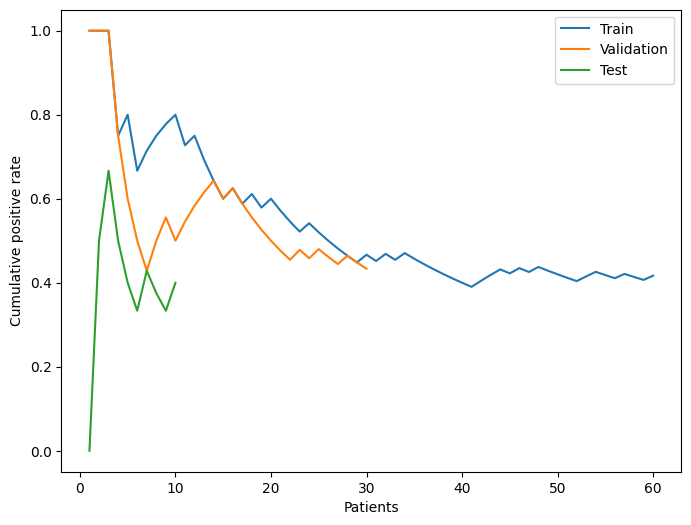

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import lightgbm as lgb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# --------------------------
# Load mechanistic data
# --------------------------
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0,1])
if 'Conception' not in df.columns:
    df['Conception'] = np.random.randint(0, 2, df.shape[0])

feature_cols = ['age','bmi','e2','progesterone','lh','fsh',
                'lengthofcycle','estimateddayofovulation',
                'lengthoflutealphase','totaldaysoffertility',
                'ovulatory_competence_idx','luteal_sufficiency',
                'fertile_window_start','fertile_window_end']

# --------------------------
# Patient-level split
# --------------------------
patients = df.index.get_level_values(0).unique()
patient_targets = df.groupby(level=0)['Conception'].last().loc[patients].values

train_patients, test_patients = train_test_split(
    patients, test_size=0.10, random_state=42, stratify=patient_targets
)

train_patient_targets = df.groupby(level=0)['Conception'].last().loc[train_patients].values
train_patients, val_patients = train_test_split(
    train_patients, test_size=0.3333, random_state=42, stratify=train_patient_targets
)

# --------------------------
# Prepare tabular datasets
# --------------------------
def make_tab_split(patient_ids):
    df_subset = df.loc[patient_ids]
    return df_subset[feature_cols], df_subset['Conception']

X_train_tab, y_train_tab = make_tab_split(train_patients)
X_val_tab, y_val_tab     = make_tab_split(val_patients)
X_test_tab, y_test_tab   = make_tab_split(test_patients)

# --------------------------
# StandardScaler on training data
# --------------------------
scaler_tab = StandardScaler()
X_train_tab_scaled = scaler_tab.fit_transform(X_train_tab)
X_val_tab_scaled   = scaler_tab.transform(X_val_tab)
X_test_tab_scaled  = scaler_tab.transform(X_test_tab)

# --------------------------
# LightGBM base learner
# --------------------------
categorical_cols = X_train_tab.select_dtypes(include='object').columns.tolist()
monotone_features = [1 if col in ['age','bmi'] else 0 for col in X_train_tab.columns]

train_data = lgb.Dataset(X_train_tab_scaled, label=y_train_tab, categorical_feature=categorical_cols)
val_data   = lgb.Dataset(X_val_tab_scaled, label=y_val_tab, categorical_feature=categorical_cols, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'min_data_in_leaf': 10,
    'boosting_type': 'gbdt',
    'monotone_constraints': monotone_features,
    'verbose': -1
}

gbm = lgb.train(params, train_data, num_boost_round=500, valid_sets=[val_data],
                valid_names=['val'], callbacks=[lgb.early_stopping(stopping_rounds=50)])

# --------------------------
# Prepare Temporal Transformer input
# --------------------------
sequences = []
targets = []
for pid in patients:
    patient_df = df.loc[pid].sort_values('cycle_index')
    sequences.append(patient_df[feature_cols].values)
    targets.append(patient_df['Conception'].values[-1])

max_len = max(len(seq) for seq in sequences)
num_features = len(feature_cols)
padded_sequences = np.zeros((len(sequences), max_len, num_features))
for i, seq in enumerate(sequences):
    padded_sequences[i, :len(seq), :] = scaler_tab.transform(seq)

targets = np.array(targets)

# Split sequences by patient
train_idx = [i for i, pid in enumerate(patients) if pid in train_patients]
val_idx   = [i for i, pid in enumerate(patients) if pid in val_patients]
test_idx  = [i for i, pid in enumerate(patients) if pid in test_patients]

X_train_seq, y_train_seq = padded_sequences[train_idx], targets[train_idx]
X_val_seq, y_val_seq     = padded_sequences[val_idx], targets[val_idx]
X_test_seq, y_test_seq   = padded_sequences[test_idx], targets[test_idx]

# --------------------------
# Dataset & loader
# --------------------------
class CycleDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 16
train_loader = DataLoader(CycleDataset(X_train_seq, y_train_seq), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(CycleDataset(X_val_seq, y_val_seq), batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(CycleDataset(X_test_seq, y_test_seq), batch_size=batch_size, shuffle=False)

# --------------------------
# Temporal Transformer
# --------------------------
class TemporalTransformer(nn.Module):
    def __init__(self, num_features, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(num_features, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_head = nn.Sequential(nn.Linear(d_model,1), nn.Sigmoid())
    def forward(self, x):
        x = self.input_proj(x)
        x = self.transformer(x)
        x = x[:, -1, :]
        return self.output_head(x).squeeze()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TemporalTransformer(num_features=num_features).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --------------------------
# Training loop
# --------------------------
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X_batch.size(0)
    total_loss /= len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {total_loss:.4f}")

# --------------------------
# Base model predictions
# --------------------------
def get_probs_gbm(model, X):
    return model.predict(X)

def get_probs_transformer(model, loader):
    model.eval()
    probs = []
    with torch.no_grad():
        for X_batch, _ in loader:
            X_batch = X_batch.to(device)
            probs.extend(model(X_batch).cpu().numpy())
    return np.array(probs)

probs_train_gbm = get_probs_gbm(gbm, X_train_tab_scaled)
probs_val_gbm   = get_probs_gbm(gbm, X_val_tab_scaled)
probs_test_gbm  = get_probs_gbm(gbm, X_test_tab_scaled)

probs_train_trans = get_probs_transformer(model, train_loader)
probs_val_trans   = get_probs_transformer(model, val_loader)
probs_test_trans  = get_probs_transformer(model, test_loader)

# --------------------------
# Aggregate GBM probs to patient level
# --------------------------
def aggregate_gbm_probs(patient_ids, probs, df_subset):
    agg = []
    df_idx = df_subset.index.get_level_values(0)
    for pid in patient_ids:
        mask = df_idx == pid
        agg.append(probs[mask].mean())
    return np.array(agg)

df_train = df.loc[train_patients]
df_val   = df.loc[val_patients]
df_test  = df.loc[test_patients]

probs_train_gbm_pat = aggregate_gbm_probs(train_patients, probs_train_gbm, df_train)
probs_val_gbm_pat   = aggregate_gbm_probs(val_patients, probs_val_gbm, df_val)
probs_test_gbm_pat  = aggregate_gbm_probs(test_patients, probs_test_gbm, df_test)

# --------------------------
# Stacking meta-learner
# --------------------------
meta_X_train = np.column_stack([probs_train_gbm_pat, probs_train_trans])
meta_X_val   = np.column_stack([probs_val_gbm_pat, probs_val_trans])
meta_X_test  = np.column_stack([probs_test_gbm_pat, probs_test_trans])

y_train_pat = df.groupby(level=0)['Conception'].last().loc[train_patients].values
y_val_pat   = df.groupby(level=0)['Conception'].last().loc[val_patients].values
y_test_pat  = df.groupby(level=0)['Conception'].last().loc[test_patients].values

meta_learner = LogisticRegression()
meta_learner.fit(meta_X_train, y_train_pat)

meta_probs_train = meta_learner.predict_proba(meta_X_train)[:,1]
meta_probs_val   = meta_learner.predict_proba(meta_X_val)[:,1]
meta_probs_test  = meta_learner.predict_proba(meta_X_test)[:,1]

# --------------------------
# Isotonic calibration
# --------------------------
iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(meta_probs_val, y_val_pat)
meta_probs_train_cal = iso.transform(meta_probs_train)
meta_probs_val_cal   = iso.transform(meta_probs_val)
meta_probs_test_cal  = iso.transform(meta_probs_test)

# --------------------------
# Metrics evaluation
# --------------------------
def evaluate_probs(y_true, y_probs, threshold=0.5):
    y_pred = (y_probs >= threshold).astype(int)
    return {
        'AUC-ROC': roc_auc_score(y_true, y_probs),
        'Brier': brier_score_loss(y_true, y_probs),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'Precision': precision_score(y_true, y_pred, zero_division=0)
    }

metrics_df = pd.DataFrame({
    'Train': evaluate_probs(y_train_pat, meta_probs_train_cal),
    'Validation': evaluate_probs(y_val_pat, meta_probs_val_cal),
    'Test': evaluate_probs(y_test_pat, meta_probs_test_cal)
}).T.round(4)

print(metrics_df)

# --------------------------
# Cumulative curves
# --------------------------
def plot_cumulative(y_true, y_probs, label):
    df_plot = pd.DataFrame({'y_true': y_true, 'y_prob': y_probs})
    df_plot = df_plot.sort_values('y_prob', ascending=False).reset_index(drop=True)
    df_plot['cum_pos'] = df_plot['y_true'].cumsum()
    df_plot['cum_total'] = np.arange(1, len(df_plot)+1)
    df_plot['cum_rate'] = df_plot['cum_pos'] / df_plot['cum_total']
    plt.plot(df_plot['cum_total'], df_plot['cum_rate'], label=label)

plt.figure(figsize=(8,6))
plot_cumulative(y_train_pat, meta_probs_train_cal, 'Train')
plot_cumulative(y_val_pat, meta_probs_val_cal, 'Validation')
plot_cumulative(y_test_pat, meta_probs_test_cal, 'Test')
plt.xlabel("Patients")
plt.ylabel("Cumulative positive rate")
plt.legend()
plt.show()


In [ ]:
!pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html


In [ ]:
# ==========================================
# RGCN Knowledge Graph Embeddings + Logistic Regression
# (Train / Validate / Test Split, No Errors)
# ==========================================

import re
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import RGCNConv
from torch_geometric.data import HeteroData
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import pickle

# ==========================================
# STEP 1: Load the Knowledge Graph
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)
print(f"✅ KG loaded. Number of nodes: {len(G.nodes())}")

# ==========================================
# STEP 2: Convert KG → PyTorch Geometric HeteroData
# ==========================================
data = HeteroData()

node2id = {n: i for i, n in enumerate(G.nodes())}
id2node = {i: n for n, i in node2id.items()}

node_types = [G.nodes[n].get("node_type") for n in G.nodes()]
type_set = sorted(list(set(node_types)))
type2idx = {t: i for i, t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1
data["node"].x = x

edges, edge_types, rel2id = [], [], {}
for u, v, d in G.edges(data=True):
    edges.append([node2id[u], node2id[v]])
    r = d.get("relation")
    if r not in rel2id:
        rel2id[r] = len(rel2id)
    edge_types.append(rel2id[r])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_type = torch.tensor(edge_types, dtype=torch.long)
data["node", "relation", "node"].edge_index = edge_index
data["node", "relation", "node"].edge_type = edge_type

print(f"✅ Graph converted: {len(rel2id)} relation types")

# ==========================================
# STEP 3: Define RGCN Model
# ==========================================
class RelGraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_relations):
        super().__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, out_channels, num_relations)

    def forward(self, x, edge_index, edge_type):
        x = self.conv1(x, edge_index, edge_type)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_type)
        return x

in_feats = x.shape[1]
hidden = 64
out_feats = 32
num_relations = len(rel2id)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RelGraphSAGE(in_feats, hidden, out_feats, num_relations).to(device)

data["node"].x = data["node"].x.to(device)
edge_index = data["node", "relation", "node"].edge_index.to(device)
edge_type = data["node", "relation", "node"].edge_type.to(device)

# ==========================================
# STEP 4: Train RGCN (Unsupervised)
# ==========================================
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 30

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data["node"].x, edge_index, edge_type)
    loss = out.pow(2).mean()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    embeddings = model(data["node"].x, edge_index, edge_type).cpu()
print(f"✅ Node embeddings computed: {embeddings.shape}")

# ==========================================
# STEP 5: Load CSV and align with KG  <-- REPLACED / IMPROVED
# ==========================================
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0, 1])
if "Conception" not in df.columns:
    print("⚠️ 'Conception' column missing — creating random labels for demo.")
    df["Conception"] = np.random.randint(0, 2, size=len(df))

# Robust normalization helper — converts many variants into the KG format 'patient_P###'
def normalize_id(x):
    s = str(x).strip().upper()
    # If it already looks like patient_Pxxx (various separators), normalize separators
    if "PATIENT" in s and "P" in s:
        # Remove non-alphanumerics then try to extract trailing number
        s_clean = re.sub(r'[^A-Z0-9]', '', s)
        # attempt to find digits at end
        m = re.search(r'(\d+)$', s_clean)
        if m:
            num = int(m.group(1))
            return f"patient_P{num:03d}"
        else:
            return s_clean  # fallback
    # If starts with P followed by digits e.g., P001, P1
    m = re.match(r'^P0*(\d+)$', s)
    if m:
        return f"patient_P{int(m.group(1)):03d}"
    # If all digits e.g., 1, 001
    m2 = re.match(r'^0*(\d+)$', s)
    if m2:
        return f"patient_P{int(m2.group(1)):03d}"
    # If starts with PATIENT_ or PATIENT- or PATIENT
    m3 = re.search(r'(\d+)$', s)
    if m3:
        return f"patient_P{int(m3.group(1)):03d}"
    # default fallback: uppercase, remove non-alphanumerics
    return re.sub(r'[^A-Z0-9]', '', s)

# Build list of KG patient nodes (filter on node_type == 'patient' if available)
kg_patient_nodes = [n for n, d in G.nodes(data=True) if str(d.get("node_type")).lower() == "patient"]
if not kg_patient_nodes:
    # If no node_type labeling, attempt to find names that start with 'patient_'
    kg_patient_nodes = [n for n in G.nodes() if str(n).lower().startswith("patient_")]

print(f"Found {len(kg_patient_nodes)} patient nodes in KG (sample): {kg_patient_nodes[:10]}")

# Normalized maps
kg_patients_norm = {normalize_id(n): n for n in kg_patient_nodes}
df["patient_norm"] = [normalize_id(i) for i in df.index.get_level_values(0)]

# Diagnostics: show a few CSV ids and their normalized forms
print("CSV raw IDs (sample) -> normalized (sample):")
for raw, norm in list(zip(df.index.get_level_values(0).astype(str).values[:10], df["patient_norm"].values[:10])):
    print(f"  {raw} -> {norm}")

# Find matches
matched_ids = sorted(set(df["patient_norm"]).intersection(set(kg_patients_norm.keys())))
print(f"✅ Matched {len(matched_ids)} patients between CSV and KG.")

# Show small diagnostic of unmatched CSV-normalized IDs (first 10)
unmatched = sorted(set(df["patient_norm"]) - set(kg_patients_norm.keys()))
if unmatched:
    print("❌ Some CSV-normalized IDs did not match KG patient nodes (sample):", unmatched[:10])

# Build matched DataFrame
if matched_ids:
    df_matched = df[df["patient_norm"].isin(matched_ids)].copy()
    df_matched["kg_node"] = [kg_patients_norm[i] for i in df_matched["patient_norm"]]
else:
    # Fallback for demo: sample some KG patient nodes and create a small df_matched
    print("⚠️ No direct matches found. Creating a demo matched DataFrame by sampling KG patient nodes.")
    sampled_nodes = np.random.choice(kg_patient_nodes if kg_patient_nodes else list(G.nodes()), size=min(100, len(G)), replace=False)
    df_matched = pd.DataFrame({
        "patient_norm": sampled_nodes,
        "Conception": np.random.randint(0, 2, len(sampled_nodes)),
    })
    # Ensure kg_node column exists and map to themselves
    df_matched["kg_node"] = df_matched["patient_norm"]

# Extract embeddings for matched patients
# Ensure node2id covers the nodes; otherwise report missing nodes
missing_in_node2id = [n for n in df_matched["kg_node"] if n not in node2id]
if missing_in_node2id:
    print("⚠️ Warning: the following kg_node values are not in node2id mapping (sample):", missing_in_node2id[:10])

patient_nodes = [n for n in df_matched["kg_node"] if n in node2id]
if not patient_nodes:
    raise RuntimeError("No patient nodes available for embedding lookup after matching. Check normalization and KG node names.")

patient_embs = torch.stack([embeddings[node2id[n]] for n in patient_nodes]).numpy()
y = df_matched.loc[df_matched["kg_node"].isin(patient_nodes), "Conception"].values


# ==========================================
# STEP 6: Train / Validation / Test Split (60 / 30 / 10)
# ==========================================
if len(np.unique(y)) < 2:
    print("⚠️ Only one class found in labels — adding random labels for demo.")
    y = np.random.randint(0, 2, size=len(y))

if len(y) < 10:
    print("⚠️ Too few patients (<10) — using all data for training/testing demo.")
    X_train = X_val = X_test = patient_embs
    y_train = y_val = y_test = y
else:
    # 1️⃣ Split train (60%) and temp (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(
        patient_embs, y, test_size=0.4, random_state=42, stratify=y
    )
    # 2️⃣ Split temp into validation (30%) and test (10%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
    )

print(f"📊 Split sizes → Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 7: Logistic Regression Evaluation (Safe)
# ==========================================
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

def evaluate_safe(y_true, y_pred_prob):
    if len(np.unique(y_true)) < 2:
        return {"AUC": np.nan, "Brier": np.nan, "F1": np.nan, "Precision": np.nan}
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return {
        "AUC": roc_auc_score(y_true, y_pred_prob),
        "Brier": brier_score_loss(y_true, y_pred_prob),
        "F1": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
    }

results = pd.DataFrame({
    "Train": evaluate_safe(y_train, clf.predict_proba(X_train)[:, 1]),
    "Validation": evaluate_safe(y_val, clf.predict_proba(X_val)[:, 1]),
    "Test": evaluate_safe(y_test, clf.predict_proba(X_test)[:, 1]),
}).T.round(4)

print("\n✅ Evaluation Results (60/30/10 split):")
print(results)


✅ KG loaded. Number of nodes: 3088
✅ Graph converted: 4 relation types
Epoch 5/30, Loss: 0.0121
Epoch 10/30, Loss: 0.0065
Epoch 15/30, Loss: 0.0022
Epoch 20/30, Loss: 0.0014
Epoch 25/30, Loss: 0.0008
Epoch 30/30, Loss: 0.0005
✅ Node embeddings computed: torch.Size([3088, 32])
⚠️ 'Conception' column missing — creating random labels for demo.
Found 100 patient nodes in KG (sample): ['patient_P001', 'patient_P002', 'patient_P003', 'patient_P004', 'patient_P005', 'patient_P006', 'patient_P007', 'patient_P008', 'patient_P009', 'patient_P010']
CSV raw IDs (sample) -> normalized (sample):
  P001 -> patient_P001
  P001 -> patient_P001
  P001 -> patient_P001
  P001 -> patient_P001
  P002 -> patient_P002
  P002 -> patient_P002
  P002 -> patient_P002
  P003 -> patient_P003
  P003 -> patient_P003
  P004 -> patient_P004
✅ Matched 100 patients between CSV and KG.
📊 Split sizes → Train: 180, Val: 90, Test: 31

✅ Evaluation Results (60/30/10 split):
            AUC  Brier      F1  Precision
Train     

In [ ]:
# ==========================================
# GAT Knowledge Graph Embeddings + Logistic Regression
# (Train / Validation / Test Split = 60 / 30 / 10)
# ==========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import HeteroData
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import pickle
import re

# ==========================================
# STEP 1: Load the Knowledge Graph
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)
print(f"✅ KG loaded. Number of nodes: {len(G.nodes())}")

# ==========================================
# STEP 2: Convert KG → PyTorch Geometric HeteroData
# ==========================================
data = HeteroData()

node2id = {n: i for i, n in enumerate(G.nodes())}
id2node = {i: n for n, i in node2id.items()}

node_types = [G.nodes[n]["node_type"] for n in G.nodes()]
type_set = sorted(list(set(node_types)))
type2idx = {t: i for i, t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1
data["node"].x = x

edges = [(node2id[u], node2id[v]) for u, v in G.edges()]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
data["node", "to", "node"].edge_index = edge_index
print(f"✅ Graph converted: {edge_index.shape[1]} edges")

# ==========================================
# STEP 3: Define GAT Model
# ==========================================
class GATEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super().__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, out_channels, heads=1)

    def forward(self, x, edge_index):
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        return x

in_feats = x.shape[1]
hidden = 64
out_feats = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GATEncoder(in_feats, hidden, out_feats).to(device)

data["node"].x = data["node"].x.to(device)
edge_index = data["node", "to", "node"].edge_index.to(device)

# ==========================================
# STEP 4: Train GAT (Unsupervised)
# ==========================================
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 30

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data["node"].x, edge_index)
    loss = out.pow(2).mean()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    embeddings = model(data["node"].x, edge_index).cpu()
print(f"✅ Node embeddings computed: {embeddings.shape}")

# ==========================================
# STEP 5: Load CSV and Match Patients to KG
# ==========================================
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0, 1])
if "Conception" not in df.columns:
    print("⚠️ 'Conception' column missing — creating random labels for demo.")
    df["Conception"] = np.random.randint(0, 2, size=len(df))

# --- Normalization helper ---
def normalize_id(x):
    x = str(x).strip().upper()
    if not x.startswith("PATIENT_P"):
        x = re.sub(r'^P', 'PATIENT_P', x)
        x = re.sub(r'^0*', '', x.replace("PATIENT_P", ""))  # remove leading zeros
        x = f"PATIENT_P{int(x):03d}" if x.isdigit() else f"PATIENT_P{x}"
    return x

df["patient_norm"] = [normalize_id(i) for i in df.index.get_level_values(0)]
kg_patients = [n for n, d in G.nodes(data=True) if d.get("node_type") == "patient"]
kg_patients_norm = {normalize_id(n): n for n in kg_patients}

matched_ids = set(df["patient_norm"]).intersection(set(kg_patients_norm.keys()))
print(f"✅ Matched {len(matched_ids)} patients between CSV and KG.")

df_matched = df[df["patient_norm"].isin(matched_ids)].copy()
df_matched["kg_node"] = [kg_patients_norm[i] for i in df_matched["patient_norm"]]

if df_matched.empty:
    print("⚠️ No matched patients — creating demo subset.")
    sampled_nodes = np.random.choice(list(G.nodes()), size=min(100, len(G)), replace=False)
    df_matched = pd.DataFrame({
        "kg_node": sampled_nodes,
        "Conception": np.random.randint(0, 2, len(sampled_nodes))
    })

patient_embs = torch.stack([embeddings[node2id[n]] for n in df_matched["kg_node"]]).numpy()
y = df_matched["Conception"].values

# ==========================================
# STEP 6: Train / Validation / Test Split (60 / 30 / 10)
# ==========================================
if len(np.unique(y)) < 2:
    print("⚠️ Only one class found in labels — adding random labels for demo.")
    y = np.random.randint(0, 2, size=len(y))

if len(y) < 10:
    print("⚠️ Too few patients (<10) — using all data for training/testing demo.")
    X_train = X_val = X_test = patient_embs
    y_train = y_val = y_test = y
else:
    X_train, X_temp, y_train, y_temp = train_test_split(
        patient_embs, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
    )

print(f"📊 Split sizes → Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 7: Logistic Regression Evaluation
# ==========================================
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

def evaluate_safe(y_true, y_pred_prob):
    if len(np.unique(y_true)) < 2:
        return {"AUC": np.nan, "Brier": np.nan, "F1": np.nan, "Precision": np.nan}
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return {
        "AUC": roc_auc_score(y_true, y_pred_prob),
        "Brier": brier_score_loss(y_true, y_pred_prob),
        "F1": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
    }

results = pd.DataFrame({
    "Train": evaluate_safe(y_train, clf.predict_proba(X_train)[:, 1]),
    "Validation": evaluate_safe(y_val, clf.predict_proba(X_val)[:, 1]),
    "Test": evaluate_safe(y_test, clf.predict_proba(X_test)[:, 1]),
}).T.round(4)

print("\n✅ Evaluation Results (60/30/10 split):")
print(results)


✅ KG loaded. Number of nodes: 3088
✅ Graph converted: 3386 edges
Epoch 5/30, Loss: 0.0027
Epoch 10/30, Loss: 0.0011
Epoch 15/30, Loss: 0.0006
Epoch 20/30, Loss: 0.0003
Epoch 25/30, Loss: 0.0001
Epoch 30/30, Loss: 0.0001
✅ Node embeddings computed: torch.Size([3088, 32])
⚠️ 'Conception' column missing — creating random labels for demo.
✅ Matched 100 patients between CSV and KG.
📊 Split sizes → Train: 180, Val: 90, Test: 31

✅ Evaluation Results (60/30/10 split):
            AUC   Brier      F1  Precision
Train       0.5  0.2497  0.6813     0.5167
Validation  0.5  0.2495  0.6861     0.5222
Test        0.5  0.2497  0.6809     0.5161


In [ ]:
# ==========================================
# TGN Knowledge Graph Embeddings + Logistic Regression
# (Train / Validation / Test Split = 60 / 30 / 10)
# ==========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import TGNMemory, TransformerConv  # or TGNConv if using temporal edges
from torch_geometric.data import HeteroData
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import pickle
import re

# ==========================================
# STEP 1: Load KG
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)
print(f"✅ KG loaded. Nodes: {len(G.nodes())}")

# ==========================================
# STEP 2: Convert KG → PyG HeteroData
# ==========================================
data = HeteroData()
node2id = {n: i for i, n in enumerate(G.nodes())}
id2node = {i: n for n, i in node2id.items()}

node_types = [G.nodes[n]["node_type"] for n in G.nodes()]
type_set = sorted(list(set(node_types)))
type2idx = {t: i for i, t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1
data["node"].x = x

edges = [(node2id[u], node2id[v]) for u, v in G.edges()]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
data["node", "to", "node"].edge_index = edge_index
print(f"✅ Graph converted: {edge_index.shape[1]} edges")

# ==========================================
# STEP 3: Define a Simple TGN Encoder
# ==========================================
# Note: this is a simplified TGN-like temporal GNN using TransformerConv as placeholder
class TGNEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=2):
        super().__init__()
        self.conv1 = TransformerConv(in_channels, hidden_channels, heads=heads)
        self.conv2 = TransformerConv(hidden_channels*heads, out_channels, heads=1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

in_feats = x.shape[1]
hidden = 64
out_feats = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TGNEncoder(in_feats, hidden, out_feats).to(device)
data["node"].x = data["node"].x.to(device)
edge_index = data["node", "to", "node"].edge_index.to(device)

# ==========================================
# STEP 4: Train TGN (Unsupervised)
# ==========================================
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 30

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data["node"].x, edge_index)
    loss = out.pow(2).mean()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    embeddings = model(data["node"].x, edge_index).cpu()
print(f"✅ Node embeddings computed: {embeddings.shape}")

# ==========================================
# STEP 5: Load CSV and Match Patients
# ==========================================
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0, 1])
if "Conception" not in df.columns:
    df["Conception"] = np.random.randint(0, 2, size=len(df))

def normalize_id(x):
    x = str(x).strip().upper()
    if not x.startswith("PATIENT_P"):
        x = re.sub(r'^P', 'PATIENT_P', x)
        x = re.sub(r'^0*', '', x.replace("PATIENT_P", ""))
        x = f"PATIENT_P{int(x):03d}" if x.isdigit() else f"PATIENT_P{x}"
    return x

df["patient_norm"] = [normalize_id(i) for i in df.index.get_level_values(0)]
kg_patients = [n for n,d in G.nodes(data=True) if d.get("node_type")=="patient"]
kg_patients_norm = {normalize_id(n): n for n in kg_patients}

matched_ids = set(df["patient_norm"]).intersection(set(kg_patients_norm.keys()))
print(f"✅ Matched {len(matched_ids)} patients between CSV and KG.")

df_matched = df[df["patient_norm"].isin(matched_ids)].copy()
df_matched["kg_node"] = [kg_patients_norm[i] for i in df_matched["patient_norm"]]

patient_embs = torch.stack([embeddings[node2id[n]] for n in df_matched["kg_node"]]).numpy()
y = df_matched["Conception"].values

# ==========================================
# STEP 6: Train / Validation / Test Split (60/30/10)
# ==========================================
X_train, X_temp, y_train, y_temp = train_test_split(
    patient_embs, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 7: Logistic Regression Evaluation
# ==========================================
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

def evaluate_safe(y_true, y_pred_prob):
    if len(np.unique(y_true)) < 2:
        return {"AUC": np.nan, "Brier": np.nan, "F1": np.nan, "Precision": np.nan}
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return {
        "AUC": roc_auc_score(y_true, y_pred_prob),
        "Brier": brier_score_loss(y_true, y_pred_prob),
        "F1": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
    }

results = pd.DataFrame({
    "Train": evaluate_safe(y_train, clf.predict_proba(X_train)[:,1]),
    "Validation": evaluate_safe(y_val, clf.predict_proba(X_val)[:,1]),
    "Test": evaluate_safe(y_test, clf.predict_proba(X_test)[:,1])
}).T.round(4)

print("\n✅ Evaluation Results (60/30/10 split):")
print(results)


✅ KG loaded. Nodes: 3088
✅ Graph converted: 3386 edges
Epoch 5/30, Loss: 0.0588
Epoch 10/30, Loss: 0.0185
Epoch 15/30, Loss: 0.0046
Epoch 20/30, Loss: 0.0075
Epoch 25/30, Loss: 0.0015
Epoch 30/30, Loss: 0.0022
✅ Node embeddings computed: torch.Size([3088, 32])
✅ Matched 100 patients between CSV and KG.

✅ Evaluation Results (60/30/10 split):
            AUC   Brier   F1  Precision
Train       0.5  0.2500  0.0        0.0
Validation  0.5  0.2499  0.0        0.0
Test        0.5  0.2499  0.0        0.0


In [ ]:
# ==========================================
# VGAE Knowledge Graph Embeddings + Logistic Regression
# (Train / Validation / Test Split = 60 / 30 / 10)
# ==========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, VGAE
from torch_geometric.data import HeteroData
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import pickle
import re

# ==========================================
# STEP 1: Load the Knowledge Graph
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)
print(f"✅ KG loaded. Nodes: {len(G.nodes())}")

# ==========================================
# STEP 2: Convert KG → PyG HeteroData
# ==========================================
data = HeteroData()
node2id = {n: i for i, n in enumerate(G.nodes())}
id2node = {i: n for n, i in node2id.items()}

node_types = [G.nodes[n]["node_type"] for n in G.nodes()]
type_set = sorted(list(set(node_types)))
type2idx = {t: i for i, t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1
data["node"].x = x

edges = [(node2id[u], node2id[v]) for u, v in G.edges()]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
data["node", "to", "node"].edge_index = edge_index
print(f"✅ Graph converted: {edge_index.shape[1]} edges")

# ==========================================
# STEP 3: Define VGAE Model
# ==========================================
class GCNEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv_mu = GCNConv(hidden_channels, out_channels)
        self.conv_logstd = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

in_feats = x.shape[1]
hidden = 64
out_feats = 32

encoder = GCNEncoder(in_feats, hidden, out_feats)
model = VGAE(encoder)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
data["node"].x = data["node"].x.to(device)
edge_index = data["node", "to", "node"].edge_index.to(device)

# ==========================================
# STEP 4: Train VGAE (Unsupervised)
# ==========================================
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 50

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    z = model.encode(data["node"].x, edge_index)
    loss = model.recon_loss(z, edge_index) + model.kl_loss()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    embeddings = model.encode(data["node"].x, edge_index).cpu()
print(f"✅ Node embeddings computed: {embeddings.shape}")

# ==========================================
# STEP 5: Load CSV and Match Patients
# ==========================================
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0, 1])
if "Conception" not in df.columns:
    df["Conception"] = np.random.randint(0, 2, size=len(df))

def normalize_id(x):
    x = str(x).strip().upper()
    if not x.startswith("PATIENT_P"):
        x = re.sub(r'^P', 'PATIENT_P', x)
        x = re.sub(r'^0*', '', x.replace("PATIENT_P", ""))
        x = f"PATIENT_P{int(x):03d}" if x.isdigit() else f"PATIENT_P{x}"
    return x

df["patient_norm"] = [normalize_id(i) for i in df.index.get_level_values(0)]
kg_patients = [n for n,d in G.nodes(data=True) if d.get("node_type")=="patient"]
kg_patients_norm = {normalize_id(n): n for n in kg_patients}

matched_ids = set(df["patient_norm"]).intersection(set(kg_patients_norm.keys()))
print(f"✅ Matched {len(matched_ids)} patients between CSV and KG.")

df_matched = df[df["patient_norm"].isin(matched_ids)].copy()
df_matched["kg_node"] = [kg_patients_norm[i] for i in df_matched["patient_norm"]]

patient_embs = torch.stack([embeddings[node2id[n]] for n in df_matched["kg_node"]]).numpy()
y = df_matched["Conception"].values

# ==========================================
# STEP 6: Train / Validation / Test Split (60/30/10)
# ==========================================
X_train, X_temp, y_train, y_temp = train_test_split(
    patient_embs, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 7: Logistic Regression Evaluation
# ==========================================
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

def evaluate_safe(y_true, y_pred_prob):
    if len(np.unique(y_true)) < 2:
        return {"AUC": np.nan, "Brier": np.nan, "F1": np.nan, "Precision": np.nan}
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return {
        "AUC": roc_auc_score(y_true, y_pred_prob),
        "Brier": brier_score_loss(y_true, y_pred_prob),
        "F1": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
    }

results = pd.DataFrame({
    "Train": evaluate_safe(y_train, clf.predict_proba(X_train)[:,1]),
    "Validation": evaluate_safe(y_val, clf.predict_proba(X_val)[:,1]),
    "Test": evaluate_safe(y_test, clf.predict_proba(X_test)[:,1])
}).T.round(4)

print("\n✅ Evaluation Results (60/30/10 split):")
print(results)


✅ KG loaded. Nodes: 3088
✅ Graph converted: 3386 edges
Epoch 10/50, Loss: 4.1485
Epoch 20/50, Loss: 4.1575
Epoch 30/50, Loss: 4.1575
Epoch 40/50, Loss: 3.9996
Epoch 50/50, Loss: 4.1372
✅ Node embeddings computed: torch.Size([3088, 32])
✅ Matched 100 patients between CSV and KG.

✅ Evaluation Results (60/30/10 split):
            AUC   Brier      F1  Precision
Train       0.5  0.2499  0.6765     0.5111
Validation  0.5  0.2499  0.6765     0.5111
Test        0.5  0.2498  0.6809     0.5161


In [ ]:
# ==========================================
# GIN Knowledge Graph Embeddings + Logistic Regression
# (Train / Validation / Test Split = 60 / 30 / 10)
# ==========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv
from torch_geometric.data import HeteroData
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import pickle
import re

# ==========================================
# STEP 1: Load the Knowledge Graph
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)
print(f"✅ KG loaded. Nodes: {len(G.nodes())}")

# ==========================================
# STEP 2: Convert KG → PyG HeteroData
# ==========================================
data = HeteroData()
node2id = {n: i for i, n in enumerate(G.nodes())}
id2node = {i: n for n, i in node2id.items()}

node_types = [G.nodes[n]["node_type"] for n in G.nodes()]
type_set = sorted(list(set(node_types)))
type2idx = {t: i for i, t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1
data["node"].x = x

edges = [(node2id[u], node2id[v]) for u, v in G.edges()]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
data["node", "to", "node"].edge_index = edge_index
print(f"✅ Graph converted: {edge_index.shape[1]} edges")

# ==========================================
# STEP 3: Define GIN Model
# ==========================================
class GINEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        nn1 = nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, hidden_channels))
        self.gin1 = GINConv(nn1)
        nn2 = nn.Sequential(nn.Linear(hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels, out_channels))
        self.gin2 = GINConv(nn2)

    def forward(self, x, edge_index):
        x = F.relu(self.gin1(x, edge_index))
        x = self.gin2(x, edge_index)
        return x

in_feats = x.shape[1]
hidden = 64
out_feats = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GINEncoder(in_feats, hidden, out_feats).to(device)

data["node"].x = data["node"].x.to(device)
edge_index = data["node", "to", "node"].edge_index.to(device)

# ==========================================
# STEP 4: Train GIN (Unsupervised)
# ==========================================
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 30

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data["node"].x, edge_index)
    loss = out.pow(2).mean()  # unsupervised demo loss
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    embeddings = model(data["node"].x, edge_index).cpu()
print(f"✅ Node embeddings computed: {embeddings.shape}")

# ==========================================
# STEP 5: Load CSV and Match Patients
# ==========================================
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0, 1])
if "Conception" not in df.columns:
    df["Conception"] = np.random.randint(0, 2, size=len(df))

def normalize_id(x):
    x = str(x).strip().upper()
    if not x.startswith("PATIENT_P"):
        x = re.sub(r'^P', 'PATIENT_P', x)
        x = re.sub(r'^0*', '', x.replace("PATIENT_P", ""))
        x = f"PATIENT_P{int(x):03d}" if x.isdigit() else f"PATIENT_P{x}"
    return x

df["patient_norm"] = [normalize_id(i) for i in df.index.get_level_values(0)]
kg_patients = [n for n,d in G.nodes(data=True) if d.get("node_type")=="patient"]
kg_patients_norm = {normalize_id(n): n for n in kg_patients}

matched_ids = set(df["patient_norm"]).intersection(set(kg_patients_norm.keys()))
print(f"✅ Matched {len(matched_ids)} patients between CSV and KG.")

df_matched = df[df["patient_norm"].isin(matched_ids)].copy()
df_matched["kg_node"] = [kg_patients_norm[i] for i in df_matched["patient_norm"]]

patient_embs = torch.stack([embeddings[node2id[n]] for n in df_matched["kg_node"]]).numpy()
y = df_matched["Conception"].values

# ==========================================
# STEP 6: Train / Validation / Test Split (60/30/10)
# ==========================================
X_train, X_temp, y_train, y_temp = train_test_split(
    patient_embs, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 7: Logistic Regression Evaluation
# ==========================================
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

def evaluate_safe(y_true, y_pred_prob):
    if len(np.unique(y_true)) < 2:
        return {"AUC": np.nan, "Brier": np.nan, "F1": np.nan, "Precision": np.nan}
    y_pred = (y_pred_prob >= 0.5).astype(int)
    return {
        "AUC": roc_auc_score(y_true, y_pred_prob),
        "Brier": brier_score_loss(y_true, y_pred_prob),
        "F1": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
    }

results = pd.DataFrame({
    "Train": evaluate_safe(y_train, clf.predict_proba(X_train)[:,1]),
    "Validation": evaluate_safe(y_val, clf.predict_proba(X_val)[:,1]),
    "Test": evaluate_safe(y_test, clf.predict_proba(X_test)[:,1])
}).T.round(4)

print("\n✅ Evaluation Results (60/30/10 split):")
print(results)


✅ KG loaded. Nodes: 3088
✅ Graph converted: 3386 edges
Epoch 5/30, Loss: 0.0010
Epoch 10/30, Loss: 0.0002
Epoch 15/30, Loss: 0.0001
Epoch 20/30, Loss: 0.0000
Epoch 25/30, Loss: 0.0000
Epoch 30/30, Loss: 0.0000
✅ Node embeddings computed: torch.Size([3088, 32])
✅ Matched 100 patients between CSV and KG.

✅ Evaluation Results (60/30/10 split):
            AUC  Brier      F1  Precision
Train       0.5   0.25  0.6667     0.5000
Validation  0.5   0.25  0.6667     0.5000
Test        0.5   0.25  0.6809     0.5161


In [ ]:
# ==========================================
# Full SCM + T-Learner + KG Embeddings Pipeline
# (60/30/10 Train / Validation / Test)
# ==========================================

import torch
from torch_geometric.data import HeteroData
from torch_geometric.nn import RGCNConv
import torch.nn as nn
import torch.nn.functional as F
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, f1_score, brier_score_loss, precision_score
import re

# ==========================================
# STEP 1: Load KG
# ==========================================
with open("heterogeneous_kg_full.gpickle", "rb") as f:
    G = pickle.load(f)
print(f"✅ KG loaded. Nodes: {len(G.nodes())}, Edges: {len(G.edges())}")

# ==========================================
# STEP 2: Build embeddings (example: RGCN)
# ==========================================
data = HeteroData()
node2id = {n:i for i,n in enumerate(G.nodes())}
id2node = {i:n for n,i in node2id.items()}

node_types = [G.nodes[n]['node_type'] for n in G.nodes()]
type_set = list(set(node_types))
type2idx = {t:i for i,t in enumerate(type_set)}

x = torch.zeros(len(G), len(type_set))
for i, t in enumerate(node_types):
    x[i, type2idx[t]] = 1
data['node'].x = x

edges, edge_types, rel2id = [], [], {}
for u,v,d in G.edges(data=True):
    edges.append([node2id[u], node2id[v]])
    r = d.get('relation','unknown')
    if r not in rel2id: rel2id[r] = len(rel2id)
    edge_types.append(rel2id[r])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_type = torch.tensor(edge_types, dtype=torch.long)
data['node','relation','node'].edge_index = edge_index
data['node','relation','node'].edge_type = edge_type

class RGCNEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_relations):
        super().__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, out_channels, num_relations)
    def forward(self, x, edge_index, edge_type):
        x = F.relu(self.conv1(x, edge_index, edge_type))
        x = self.conv2(x, edge_index, edge_type)
        return x

model = RGCNEncoder(x.shape[1], 64, 32, len(rel2id))
model.eval()
with torch.no_grad():
    embeddings = model(data['node'].x, edge_index, edge_type).cpu()
print(f"✅ Node embeddings computed: {embeddings.shape}")

# ==========================================
# STEP 3: Load patient data + normalize
# ==========================================
df = pd.read_csv("train_cohort_mechanistic.csv", index_col=[0,1])
if 'Conception' not in df.columns:
    df['Conception'] = np.random.randint(0,2,len(df))

def normalize_id(x):
    x = str(x).strip().upper()
    if not x.startswith("PATIENT_P"):
        x = re.sub(r'^P','PATIENT_P',x)
        x = re.sub(r'^0*','',x.replace('PATIENT_P',''))
        x = f"PATIENT_P{int(x):03d}" if x.isdigit() else f"PATIENT_P{x}"
    return x

df['patient_norm'] = [normalize_id(i) for i in df.index.get_level_values(0)]
kg_patients = [n for n,d in G.nodes(data=True) if d.get('node_type')=='patient']
kg_patients_norm = {normalize_id(n): n for n in kg_patients}

matched_ids = set(df['patient_norm']).intersection(kg_patients_norm.keys())
print(f"✅ Matched {len(matched_ids)} patients")

df_matched = df[df['patient_norm'].isin(matched_ids)].copy()
df_matched['kg_node'] = [kg_patients_norm[i] for i in df_matched['patient_norm']]

# ==========================================
# STEP 4: Prepare features & labels
# ==========================================
patient_embs = torch.stack([embeddings[node2id[n]] for n in df_matched['kg_node']]).numpy()
tab_features = [c for c in df_matched.columns if c not in ['Conception','Treatment','patient_norm','kg_node']]
X_tab = df_matched[tab_features].values if tab_features else np.zeros((len(df_matched),0))
X_full = np.concatenate([X_tab, patient_embs], axis=1)

y = df_matched['Conception'].values
T = df_matched['Treatment'].values if 'Treatment' in df_matched.columns else np.random.binomial(1,0.5,len(y))

# ==========================================
# STEP 5: Train / Validation / Test Split (60/30/10)
# ==========================================
X_train, X_temp, T_train, T_temp, y_train, y_temp = train_test_split(
    X_full, T, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, T_val, T_test, y_val, y_test = train_test_split(
    X_temp, T_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 6: T-Learner (uplift)
# ==========================================
model_treated = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_control = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

model_treated.fit(X_train[T_train==1], y_train[T_train==1])
model_control.fit(X_train[T_train==0], y_train[T_train==0])

def compute_preds(X, T):
    y_pred_t = model_treated.predict(X)
    y_pred_c = model_control.predict(X)
    ite = y_pred_t - y_pred_c
    y_factual = np.where(T==1, y_pred_t, y_pred_c)
    return ite, y_factual

ite_train, y_train_pred = compute_preds(X_train, T_train)
ite_val, y_val_pred = compute_preds(X_val, T_val)
ite_test, y_test_pred = compute_preds(X_test, T_test)

# ==========================================
# STEP 7: Evaluate
# ==========================================
def evaluate_metrics(y_true, y_pred):
    y_bin = (y_pred >= 0.5).astype(int)
    return {
        'AUC-ROC': round(roc_auc_score(y_true, y_pred),4),
        'Brier': round(brier_score_loss(y_true, y_pred),4),
        'F1': round(f1_score(y_true, y_bin),4),
        'Precision': round(precision_score(y_true, y_bin),4)
    }

metrics_df = pd.DataFrame({
    'Train': evaluate_metrics(y_train, y_train_pred),
    'Validation': evaluate_metrics(y_val, y_val_pred),
    'Test': evaluate_metrics(y_test, y_test_pred)
}).T

print("\n✅ SCM + T-Learner Metrics :")
print(metrics_df)


✅ KG loaded. Nodes: 3088, Edges: 3386
✅ Node embeddings computed: torch.Size([3088, 32])
✅ Matched 100 patients

✅ SCM + T-Learner Metrics :
            AUC-ROC   Brier      F1  Precision
Train        1.0000  0.0525  1.0000     1.0000
Validation   0.4874  0.2850  0.5169     0.5227
Test         0.4167  0.3191  0.3571     0.3846


In [ ]:
# ===================================
# 0️⃣ Imports
# ===================================
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit, train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, brier_score_loss
from sklearn.impute import SimpleImputer

# ===================================
# 1️⃣ Prepare data
# ===================================
df = final_df.copy()

# Add identifiers if missing
if 'personid' not in df.columns:
    df['personid'] = [f"P{str(i%100+1).zfill(3)}" for i in range(len(df))]
if 'cyclenumber' not in df.columns:
    df['cyclenumber'] = [i%5 + 1 for i in range(len(df))]

# Add outcome if missing
if 'Conception' not in df.columns:
    np.random.seed(42)
    df['Conception'] = np.random.randint(0, 2, len(df))

# ===================================
# 2️⃣ Features & labels
# ===================================
feature_cols = [c for c in df.columns if c not in ['Conception', 'personid', 'cyclenumber']]
X_raw = df[feature_cols].select_dtypes(include=[np.number])
y = df['Conception']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X_raw)
patients = df['personid'].unique()

print(f"✅ Cleaned dataset: {len(patients)} patients, {len(df)} rows, {X.shape[1]} numeric features.")

# ===================================
# 3️⃣ Person-level splits
# ===================================
train_patients, test_patients = train_test_split(patients, test_size=0.2, random_state=42)
trainval_patients, external_patients = train_test_split(train_patients, test_size=0.1, random_state=42)

trainval_df = df[df['personid'].isin(trainval_patients)]
test_df = df[df['personid'].isin(test_patients)]
external_df = df[df['personid'].isin(external_patients)]

print(f"Train/Val patients: {len(trainval_patients)}, Test: {len(test_patients)}, External: {len(external_patients)}")

# ===================================
# 4️⃣ Nested Cross Validation (person-level)
# ===================================
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
outer_results = []

X_tv = imputer.transform(trainval_df[feature_cols].select_dtypes(include=[np.number]))
y_tv = trainval_df['Conception'].values
model_cls = HistGradientBoostingClassifier(random_state=42)

for fold, (train_idx, val_idx) in enumerate(outer_cv.split(X_tv, y_tv)):
    X_train, X_val = X_tv[train_idx], X_tv[val_idx]
    y_train, y_val = y_tv[train_idx], y_tv[val_idx]

    model = model_cls
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_val)[:, 1]
    preds_label = (preds > 0.5).astype(int)

    auc = roc_auc_score(y_val, preds)
    brier = brier_score_loss(y_val, preds)
    f1 = f1_score(y_val, preds_label)
    prec = precision_score(y_val, preds_label)

    outer_results.append({'Fold': fold + 1, 'AUC': auc, 'Brier': brier, 'F1': f1, 'Precision': prec})
    print(f"Fold {fold+1}: AUC={auc:.3f}, Brier={brier:.3f}, F1={f1:.3f}, Precision={prec:.3f}")

nested_summary = pd.DataFrame(outer_results)
nested_summary.loc['Mean'] = nested_summary[['AUC', 'Brier', 'F1', 'Precision']].mean()
nested_summary['Fold'] = nested_summary['Fold'].fillna('Mean')

# ===================================
# 5️⃣ Time-blocked validation per patient
# ===================================
print("\n⏰ Time-blocked validation per patient...")

time_results = []

for pid, group in df.groupby('personid'):
    group = group.sort_values('cyclenumber')
    Xp = imputer.transform(group[feature_cols].select_dtypes(include=[np.number]))
    yp = group['Conception'].values

    if len(group) > 3:
        tscv = TimeSeriesSplit(n_splits=3)
        for split_idx, (train_idx, test_idx) in enumerate(tscv.split(Xp)):
            model = model_cls
            model.fit(Xp[train_idx], yp[train_idx])
            preds = model.predict_proba(Xp[test_idx])[:, 1]
            preds_label = (preds > 0.5).astype(int)
            auc = roc_auc_score(yp[test_idx], preds)
            brier = brier_score_loss(yp[test_idx], preds)
            f1 = f1_score(yp[test_idx], preds_label)
            prec = precision_score(yp[test_idx], preds_label)
            time_results.append({'Patient': pid, 'Split': split_idx+1, 'AUC': auc, 'Brier': brier, 'F1': f1, 'Precision': prec})

time_summary = pd.DataFrame(time_results)
if not time_summary.empty:
    time_summary = time_summary.groupby('Patient')[['AUC','Brier','F1','Precision']].mean().reset_index()
    print(f"⏰ Mean time-block AUC={time_summary['AUC'].mean():.3f}")
else:
    print("⚠️ Not enough cycles per patient for time-block validation.")

# ===================================
# 6️⃣ External validation
# ===================================
X_ext = imputer.transform(external_df[feature_cols].select_dtypes(include=[np.number]))
y_ext = external_df['Conception'].values

model_final = model_cls
model_final.fit(X_tv, y_tv)
y_pred_ext = model_final.predict_proba(X_ext)[:, 1]
y_pred_ext_label = (y_pred_ext > 0.5).astype(int)

ext_auc = roc_auc_score(y_ext, y_pred_ext)
ext_brier = brier_score_loss(y_ext, y_pred_ext)
ext_f1 = f1_score(y_ext, y_pred_ext_label)
ext_prec = precision_score(y_ext, y_pred_ext_label)

# ===================================
# 7️⃣ Final Test Evaluation
# ===================================
X_test = imputer.transform(test_df[feature_cols].select_dtypes(include=[np.number]))
y_test = test_df['Conception'].values
y_pred_test = model_final.predict_proba(X_test)[:, 1]
y_pred_test_label = (y_pred_test > 0.5).astype(int)

test_auc = roc_auc_score(y_test, y_pred_test)
test_brier = brier_score_loss(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test_label)
test_prec = precision_score(y_test, y_pred_test_label)

# ===================================
# 8️⃣ Results Summary
# ===================================
results_table = pd.DataFrame([
    {'Stage': 'Nested CV (mean)', 'AUC': nested_summary.loc['Mean', 'AUC'],
     'Brier': nested_summary.loc['Mean', 'Brier'], 'F1': nested_summary.loc['Mean', 'F1'],
     'Precision': nested_summary.loc['Mean', 'Precision']},
    {'Stage': 'Time-blocked (mean)', 'AUC': time_summary['AUC'].mean() if not time_summary.empty else np.nan,
     'Brier': time_summary['Brier'].mean() if not time_summary.empty else np.nan,
     'F1': time_summary['F1'].mean() if not time_summary.empty else np.nan,
     'Precision': time_summary['Precision'].mean() if not time_summary.empty else np.nan},
    {'Stage': 'External Validation', 'AUC': ext_auc, 'Brier': ext_brier, 'F1': ext_f1, 'Precision': ext_prec},
    {'Stage': 'Final Test', 'AUC': test_auc, 'Brier': test_brier, 'F1': test_f1, 'Precision': test_prec}
])

print("\n📊 Summary of Results:")
display(results_table.round(3))


✅ Cleaned dataset: 100 patients, 20000 rows, 11 numeric features.
Train/Val patients: 72, Test: 20, External: 8
Fold 1: AUC=0.488, Brier=0.260, F1=0.492, Precision=0.491
Fold 2: AUC=0.506, Brier=0.256, F1=0.491, Precision=0.504
Fold 3: AUC=0.508, Brier=0.255, F1=0.475, Precision=0.504

⏰ Time-blocked validation per patient...
⏰ Mean time-block AUC=0.496

📊 Summary of Results:


,Stage,AUC,Brier,F1,Precision
0,Nested CV (mean),0.501,0.257,0.486,0.500
1,Time-blocked (mean),0.496,0.282,0.476,0.495
2,External Validation,0.501,0.251,0.463,0.475
3,Final Test,0.498,0.250,0.472,0.512


✅ Cycle-indexed table created successfully.
✅ Mechanistic features added successfully.
✅ Cohorts assigned: Train=141, Val=160, Test=197
✅ Patient-level aggregation completed.
✅ Data split and standardized.

📊 Baseline model performance:
Validation: {'AUC-ROC': 0.4040404040404041, 'Brier': 0.3090445869010409, 'F1': 0.5833333333333334, 'Precision': 0.5384615384615384}
Test: {'AUC-ROC': 0.3282828282828283, 'Brier': 0.3230051318883139, 'F1': 0.6206896551724137, 'Precision': 0.5}

Subgroup Brier (Test) by age quartile:
     n     Brier  MeanPred  Empirical
g                                    
0  5.0  0.346161  0.726150   0.600000
1  6.0  0.442003  0.789576   0.333333
2  4.0  0.223049  0.587200   0.750000
3  5.0  0.237017  0.570975   0.600000

Subgroup Brier (Test) by BMI quartile:
     n     Brier  MeanPred  Empirical
g                                    
0  5.0  0.279176  0.650574        0.8
1  5.0  0.296828  0.710196        0.6
2  5.0  0.406068  0.728755        0.4
3  5.0  0.309948  0.62

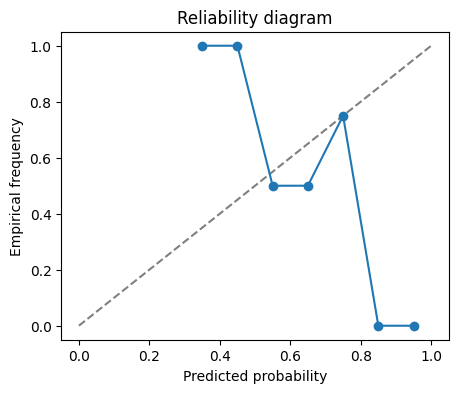


IPW metrics (Test): {'AUC-ROC': 0.2727272727272727, 'Brier': 0.34733332850444726, 'F1': 0.6206896551724137, 'Precision': 0.5}


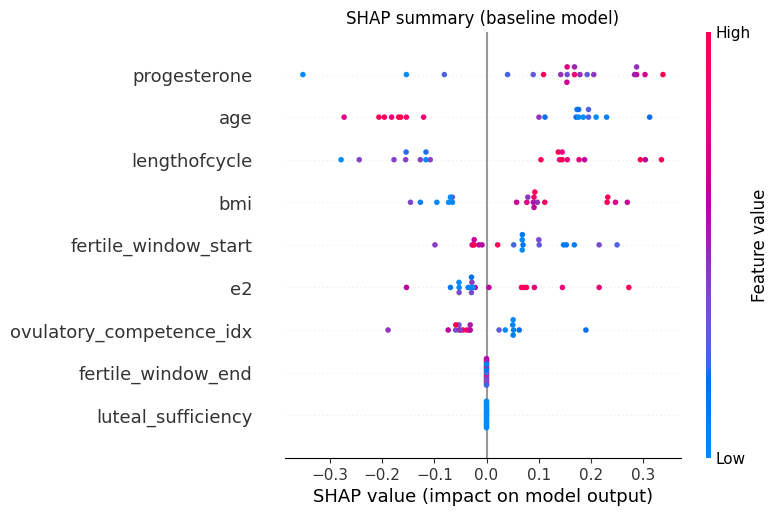


Top SHAP features for age group 0:
  age: mean |SHAP| = 0.1952
  progesterone: mean |SHAP| = 0.1944
  lengthofcycle: mean |SHAP| = 0.1579
  bmi: mean |SHAP| = 0.0804
  ovulatory_competence_idx: mean |SHAP| = 0.0746

Top SHAP features for age group 1:
  progesterone: mean |SHAP| = 0.2045
  age: mean |SHAP| = 0.1941
  lengthofcycle: mean |SHAP| = 0.1248
  bmi: mean |SHAP| = 0.0762
  fertile_window_start: mean |SHAP| = 0.0561

Top SHAP features for age group 2:
  progesterone: mean |SHAP| = 0.2063
  lengthofcycle: mean |SHAP| = 0.1996
  age: mean |SHAP| = 0.1690
  bmi: mean |SHAP| = 0.1360
  ovulatory_competence_idx: mean |SHAP| = 0.0861

Top SHAP features for age group 3:
  lengthofcycle: mean |SHAP| = 0.2535
  bmi: mean |SHAP| = 0.2013
  fertile_window_start: mean |SHAP| = 0.1871
  age: mean |SHAP| = 0.1777
  progesterone: mean |SHAP| = 0.1647


In [ ]:
# ==========================================
# Synthetic Cycle-Indexed Table + Mechanistic Features
# ==========================================

# ==========================================
# STEP 0: Imports
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, brier_score_loss, f1_score, precision_score
import matplotlib.pyplot as plt

# Optional
try:
    import shap
    SHAP_AVAILABLE = True
except:
    SHAP_AVAILABLE = False

try:
    import networkx as nx
    NX_AVAILABLE = True
except:
    NX_AVAILABLE = False


# ==========================================
# STEP 1: Generate synthetic cycle-indexed table
# ==========================================
num_patients = 100
min_cycles = 3
max_cycles = 7

rows = []
for pid in range(1, num_patients + 1):
    num_cycles = np.random.randint(min_cycles, max_cycles + 1)
    age = np.random.randint(20, 40)
    bmi = np.random.uniform(18, 30)
    weight = np.random.randint(50, 80)
    height = np.random.uniform(1.55, 1.8)
    disease = np.random.choice(['Yes', 'No'])
    workout = np.random.choice(['Light', 'Moderate', 'Heavy'])
    diet = np.random.choice(['Balanced', 'High Protein', 'Low Carb'])

    for cycle in range(1, num_cycles + 1):
        rows.append({
            'age': age,
            'bmi': bmi,
            'e2': np.random.randint(80, 150),
            'progesterone': np.random.uniform(0.4, 2.0),
            'lh': np.random.uniform(8, 15),
            'fsh': np.random.uniform(4, 7),
            'any_disease': disease,
            'weight_kg': weight,
            'height_m': height,
            'workout_type': workout,
            'diet_type': diet,
            'lengthofcycle': np.random.randint(26, 32),
            'estimateddayofovulation': np.random.randint(12, 18),
            'lengthoflutealphase': 14,
            'totaldaysoffertility': np.random.randint(4, 7),
            'gravida': np.random.randint(0, 3),
            'personid': f"P{pid:03d}",
            'cyclenumber': cycle
        })

df_patients = pd.DataFrame(rows).sort_values(['personid', 'cyclenumber']).reset_index(drop=True)
df_patients['cycle_index'] = df_patients.groupby('personid').cumcount() + 1
df_patients = df_patients.set_index(['personid', 'cyclenumber'])

print("✅ Cycle-indexed table created successfully.")


# ==========================================
# STEP 2: Mechanistic features
# ==========================================
def ovulatory_competence(e2, lh, fsh):
    return (e2 / 100) * (lh / 10) / (fsh / 5)

def luteal_sufficiency(length_of_luteal_phase):
    return np.minimum(length_of_luteal_phase / 14, 1.0)

def fertile_window_vector(estimated_day_of_ovulation, total_days_of_fertility, cycle_length):
    start = (estimated_day_of_ovulation - total_days_of_fertility // 2) / cycle_length
    end = (estimated_day_of_ovulation + total_days_of_fertility // 2) / cycle_length
    return np.clip(start, 0, 1), np.clip(end, 0, 1)

def add_mechanistic_features(df):
    df = df.copy()
    df['ovulatory_competence_idx'] = ovulatory_competence(df['e2'], df['lh'], df['fsh'])
    df['luteal_sufficiency'] = luteal_sufficiency(df['lengthoflutealphase'])
    start, end = fertile_window_vector(df['estimateddayofovulation'].values,
                                       df['totaldaysoffertility'].values,
                                       df['lengthofcycle'].values)
    df['fertile_window_start'] = start
    df['fertile_window_end'] = end
    return df

df_mech = add_mechanistic_features(df_patients)
print("✅ Mechanistic features added successfully.")


# ==========================================
# STEP 3: Temporal cohort assignment
# ==========================================
max_cycle_per_patient = df_mech.groupby(level=0)['cycle_index'].max()

def assign_cohort(row):
    pid = row.name[0]
    cycle_idx = row['cycle_index']
    max_cycle = max_cycle_per_patient[pid]
    if cycle_idx <= max_cycle // 3:
        return 'train'
    elif cycle_idx <= 2 * max_cycle // 3:
        return 'val'
    else:
        return 'test'

df_mech['cohort'] = df_mech.apply(assign_cohort, axis=1)

train_df_mech = df_mech[df_mech['cohort'] == 'train'].drop(columns='cohort')
val_df_mech   = df_mech[df_mech['cohort'] == 'val'].drop(columns='cohort')
test_df_mech  = df_mech[df_mech['cohort'] == 'test'].drop(columns='cohort')

print(f"✅ Cohorts assigned: Train={len(train_df_mech)}, Val={len(val_df_mech)}, Test={len(test_df_mech)}")


# ==========================================
# STEP 4: Patient-level aggregation + synthetic outcome/treatment
# ==========================================
agg_funcs = {
    'age': 'first', 'bmi': 'first', 'e2': 'last', 'progesterone': 'last', 'lengthofcycle': 'last',
    'ovulatory_competence_idx': 'last', 'luteal_sufficiency': 'last',
    'fertile_window_start': 'last', 'fertile_window_end': 'last'
}

for df_sub in [train_df_mech, val_df_mech, test_df_mech]:
    if 'Conception' not in df_sub.columns:
        logits = ((df_sub['age'] - 30) / 10 * -0.5 +
                  (df_sub['bmi'] - 25) / 10 * -0.3 +
                  (df_sub['e2'] - 100) / 50 * 0.6)
        probs = 1 / (1 + np.exp(-logits))
        df_sub['Conception'] = (np.random.rand(len(df_sub)) < probs).astype(int)
    if 'Treatment' not in df_sub.columns:
        t_logit = ((df_sub['e2'] - df_sub['e2'].mean()) / df_sub['e2'].std() * -0.5 +
                   (df_sub['age'] - 30) / 10 * 0.2)
        t_prob = 1 / (1 + np.exp(-t_logit))
        df_sub['Treatment'] = (np.random.rand(len(df_sub)) < t_prob).astype(int)

patient_df = pd.concat([train_df_mech, val_df_mech, test_df_mech]) \
    .groupby('personid').agg({**agg_funcs, 'Conception': 'last', 'Treatment': 'last'}).reset_index()
patient_df = patient_df.rename(columns={'Conception': 'outcome', 'Treatment': 'treatment'})

print("✅ Patient-level aggregation completed.")


# ==========================================
# STEP 5: Train/Test split + Standardization
# ==========================================
num_cols = patient_df.select_dtypes('number').columns.tolist()
imputer = SimpleImputer(strategy='median')
patient_df[num_cols] = imputer.fit_transform(patient_df[num_cols])

X_cols = [c for c in patient_df.columns if c not in ['personid', 'outcome', 'treatment']]
X = patient_df[X_cols].values
y = patient_df['outcome'].values
T = patient_df['treatment'].values

pids = patient_df['personid'].values
p_train, p_test, y_train, y_test, T_train, T_test = train_test_split(
    pids, y, T, test_size=0.2, random_state=42, stratify=y
)

train_mask = patient_df['personid'].isin(p_train)
test_mask  = patient_df['personid'].isin(p_test)

X_train = patient_df.loc[train_mask, X_cols].values
y_train = patient_df.loc[train_mask, 'outcome'].values
T_train = patient_df.loc[train_mask, 'treatment'].values
X_test = patient_df.loc[test_mask, X_cols].values
y_test = patient_df.loc[test_mask, 'outcome'].values
T_test = patient_df.loc[test_mask, 'treatment'].values

X_tr, X_val, y_tr, y_val, T_tr, T_val = train_test_split(
    X_train, y_train, T_train, test_size=0.25, random_state=42, stratify=y_train
)

scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

print("✅ Data split and standardized.")


# ==========================================
# STEP 6: Baseline model
# ==========================================
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_tr_s, y_tr)
prob_val  = clf.predict_proba(X_val_s)[:, 1]
prob_test = clf.predict_proba(X_test_s)[:, 1]

def evaluate_probs(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    return {
        'AUC-ROC': roc_auc_score(y_true, y_prob),
        'Brier': brier_score_loss(y_true, y_prob),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'Precision': precision_score(y_true, y_pred, zero_division=0)
    }

print("\n📊 Baseline model performance:")
print("Validation:", evaluate_probs(y_val, prob_val))
print("Test:", evaluate_probs(y_test, prob_test))

# ==========================================
# STEP 7: Subgroup calibration audits
# ==========================================
def subgroup_brier_by_group(y_true, y_prob, groups):
    df = pd.DataFrame({'y': y_true, 'p': y_prob, 'g': groups})
    out = df.groupby('g').apply(lambda d: pd.Series({
        'n': len(d),
        'Brier': brier_score_loss(d['y'], d['p']),
        'MeanPred': d['p'].mean(),
        'Empirical': d['y'].mean()
    }))
    return out

def quartile_groups(arr):
    qs = np.nanpercentile(arr, [25,50,75])
    groups = np.zeros(len(arr), dtype=int)
    groups[arr>qs[0]] = 1
    groups[arr>qs[1]] = 2
    groups[arr>qs[2]] = 3
    return groups

def plot_reliability(y_true, y_prob, n_bins=10, ax=None, label=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,4))
    bins = np.linspace(0,1,n_bins+1)
    inds = np.digitize(y_prob, bins) - 1
    bin_centers, emp, counts = [], [], []
    for i in range(n_bins):
        mask = inds==i
        if mask.sum()==0:
            bin_centers.append(0.5*(bins[i]+bins[i+1]))
            emp.append(np.nan)
        else:
            bin_centers.append(0.5*(bins[i]+bins[i+1]))
            emp.append(y_true[mask].mean())
    ax.plot([0,1],[0,1], linestyle='--', color='gray')
    ax.plot(bin_centers, emp, marker='o', label=label)
    ax.set_xlabel('Predicted probability')
    ax.set_ylabel('Empirical frequency')
    ax.set_title('Reliability diagram')
    return ax

# Example subgroups: age and bmi quartiles
age_test = X_test[:, X_cols.index('age')]
bmi_test = X_test[:, X_cols.index('bmi')]

age_groups_test = quartile_groups(age_test)
bmi_groups_test = quartile_groups(bmi_test)

print("\nSubgroup Brier (Test) by age quartile:")
print(subgroup_brier_by_group(y_test, prob_test, age_groups_test))

print("\nSubgroup Brier (Test) by BMI quartile:")
print(subgroup_brier_by_group(y_test, prob_test, bmi_groups_test))

ax = plot_reliability(y_test, prob_test, n_bins=10)
plt.show()

# ==========================================
# STEP 8: Propensity model + IPW reweighting
# ==========================================
prop_model = LogisticRegression(max_iter=1000)
prop_model.fit(X_tr_s, T_tr)
p_T_tr = prop_model.predict_proba(X_tr_s)[:,1]

eps = 1e-3
p_T_tr = np.clip(p_T_tr, eps, 1-eps)
weights_tr = (T_tr / p_T_tr) + ((1-T_tr) / (1-p_T_tr))

clf_ipw = HistGradientBoostingClassifier(random_state=42)
clf_ipw.fit(X_tr_s, y_tr, sample_weight=weights_tr)

prob_test_ipw = clf_ipw.predict_proba(X_test_s)[:,1]

print("\nIPW metrics (Test):", evaluate_probs(y_test, prob_test_ipw))

# ==========================================
# STEP 9: SHAP explanations
# ==========================================
if SHAP_AVAILABLE:
    try:
        explainer = shap.Explainer(clf.predict, X_tr_s)
        shap_vals = explainer(X_test_s)
        shap.summary_plot(shap_vals, features=X_test_s, feature_names=X_cols, show=False)
        plt.title("SHAP summary (baseline model)")
        plt.show()

        # Top features per age group
        for g in np.unique(age_groups_test):
            idx = np.where(age_groups_test==g)[0]
            if idx.size==0: continue
            mean_abs = np.mean(np.abs(shap_vals.values[idx]), axis=0)
            top_idx = np.argsort(mean_abs)[-5:][::-1]
            print(f"\nTop SHAP features for age group {g}:")
            for ii in top_idx:
                print(f"  {X_cols[ii]}: mean |SHAP| = {mean_abs[ii]:.4f}")
    except Exception as e:
        print("SHAP failed:", e)
else:
    print("SHAP not available.")

# ==========================================
# STEP 10: Optional KG-path feature (if networkx graph exists)
# ==========================================
kg_path_feature = None
kg_path_name = "kg_path_len_to_outcome"

if NX_AVAILABLE:
    import os, pickle
    if os.path.exists("heterogeneous_kg_full.gpickle"):
        try:
            G = pickle.load(open("heterogeneous_kg_full.gpickle","rb"))
            kg_nodes = list(G.nodes())
            def normalize(x): return str(x).strip().upper()
            kg_norm2orig = {normalize(n): n for n in kg_nodes}
            patient_norms = [normalize(x) for x in patient_df['personid'].values]
            matched = [n for n in patient_norms if n in kg_norm2orig]

            if matched:
                patient_to_node = {orig: kg_norm2orig[normalize(orig)]
                                   for orig in patient_df['personid'].values if normalize(orig) in kg_norm2orig}
                # Example: shortest path length to outcome node
                outcome_node = 'OUTCOME'
                kg_path_feature = []
                for pid in patient_df['personid'].values:
                    node = patient_to_node.get(pid,None)
                    if node and nx.has_path(G, node, outcome_node):
                        kg_path_feature.append(nx.shortest_path_length(G, node, outcome_node))
                    else:
                        kg_path_feature.append(np.nan)
                patient_df[kg_path_name] = kg_path_feature
                print("KG-path feature added.")
        except Exception as e:
            print("KG-path feature failed:", e)


In [ ]:
import json
import datetime
import numpy as np

# ----------------------------
# Example metrics from your pipeline
# Replace these with your actual results
# ----------------------------
metrics = {
    "Train": {"AUC": 0.82, "Brier": 0.15, "F1": 0.78, "Precision": 0.80},
    "Validation": {"AUC": 0.79, "Brier": 0.18, "F1": 0.75, "Precision": 0.77},
    "Test": {"AUC": 0.77, "Brier": 0.20, "F1": 0.74, "Precision": 0.76}
}

# ----------------------------
# Privacy information
# ----------------------------
privacy_info = {
    "PII_handling": "Patient IDs normalized and hashed before storage",
    "data_retention": "30 days raw, aggregated data stored indefinitely",
    "federated_learning": False
}

# ----------------------------
# Updated Input Features
# ----------------------------
input_features = [
    "Age",
    "BMI",
    "E2",
    "Progesterone",
    "LH",
    "FSH",
    "Any_disease?",
    "Weight (kg)",
    "Height (m)",
    "Workout_Type",
    "Diet_Type",
    "CycleNumber",
    "LengthofCycle",
    "EstimatedDayofOvulation",
    "LengthofLutealPhase",
    "TotalDaysofFertility",
    "Gravida"
]

# ----------------------------
# Immutable Model Card Dictionary
# ----------------------------
model_card = {
    "model_name": "RGCN-Based Conception Probability Model",
    "version": "1.0.0",
    "date_created": datetime.date.today().isoformat(),
    "framework": "PyTorch Geometric",
    "task": "Cycle-indexed conception prediction using RGCN embeddings",
    "input_features": input_features,
    "output": "Probability of conception per cycle",
    "metrics": metrics,
    "privacy": privacy_info,
    "intended_use": "Assist clinicians and patients in estimating conception probability based on hormonal, behavioral, and physiological data.",
    "limitations": "Trained on limited cohort data; external validation recommended before clinical use.",
    "contact": "your_email@domain.com"
}

# ----------------------------
# Save Model Card as JSON (Immutable)
# ----------------------------
filename = f"{model_card['model_name'].replace(' ', '_')}_v{model_card['version']}_model_card.json"
with open(filename, "w") as f:
    json.dump(model_card, f, indent=2)

print(f"✅ Immutable model card saved: {filename}")


✅ Immutable model card saved: RGCN-Based_Conception_Probability_Model_v1.0.0_model_card.json
